## 3. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download the data

In [1]:
import pandas as pd
import numpy as np
import os

In [ ]:
#DATA_ROOT="/content/drive/MyDrive/AReM"
DATA_ROOT="/AReM"

files=[]
for folder in sorted(os.listdir(DATA_ROOT)):
  folder_path=os.path.join(DATA_ROOT,folder)
  if not os.path.isdir(folder_path):
    continue
  for filename in sorted(os.listdir(folder_path)):
    row={
        'folder':folder,
        'filename':filename
    }
    files.append(row)

df_info=pd.DataFrame(files)
df_info

,folder,filename
0,bending1,dataset1.csv
1,bending1,dataset2.csv
2,bending1,dataset3.csv
3,bending1,dataset4.csv
4,bending1,dataset5.csv
...,...,...
83,walking,dataset5.csv
84,walking,dataset6.csv
85,walking,dataset7.csv
86,walking,dataset8.csv


### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [3]:
def is_test(files):
  if files['folder'] in ['bending1','bending2']:
    return files['filename'] in ['dataset1.csv','dataset2.csv']
  else:
    return files['filename'] in ['dataset1.csv','dataset2.csv','dataset3.csv']

df_info['is_test']=df_info.apply(is_test,axis=1)
df_info.head()

,folder,filename,is_test
0,bending1,dataset1.csv,True
1,bending1,dataset2.csv,True
2,bending1,dataset3.csv,False
3,bending1,dataset4.csv,False
4,bending1,dataset5.csv,False


### (c) Feature Extraction: Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

#### i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc)

For each of the 6 time series, I will extract Minimum, Maximum, Mean, Median, Standard Deviation, 1st Quartile (25%), 3rd Quartile (75%)

This gives 7 features * 6 time series = 42 total features per instance.

#### ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.(20 pts)

Before reading the data, I manually removed a redundant comma in the last line of ./cycling/dataset9.csv and ./cycling/dataset14.csv.

Additionally, I applied a different parsing method to ./bending2/dataset4.csv due to its inconsistent format.

In [4]:
all_file_features=[]

for idx,files in df_info.iterrows():
    filepath=os.path.join(DATA_ROOT,files['folder'],files['filename'])
    #print(filepath)
    if os.path.join(files['folder'],files['filename'])=='bending2/dataset4.csv':
      df=pd.read_csv(filepath,skiprows=4,sep='\s+',engine='python')
    else:
      df=pd.read_csv(filepath,skiprows=4,sep=',')
    df=df.iloc[:,1:]  #drop first col(Columns: time)
    #print(df.head())

    file_features={}
    for i,col in enumerate(df.columns):
        x=df[col].values
        file_features[f'min{i+1}']=np.min(x)
        file_features[f'max{i+1}']=np.max(x)
        file_features[f'mean{i+1}']=np.mean(x)
        file_features[f'median{i+1}']=np.median(x)
        file_features[f'std{i+1}']=np.std(x)
        file_features[f'q1{i+1}']=np.percentile(x,25)
        file_features[f'q3{i+1}']=np.percentile(x,75)
    file_features['label']=files['folder']
    file_features['filename']=files['filename']
    file_features['is_test']=files['is_test']

    all_file_features.append(file_features)

df_features=pd.DataFrame(all_file_features)
df_features


,min1,max1,mean1,median1,std1,q11,q31,min2,max2,mean2,...,min6,max6,mean6,median6,std6,q16,q36,label,filename,is_test
0,37.25,45.00,40.624792,40.500,1.475428,39.25,42.0000,0.0,1.30,0.358604,...,0.0,1.92,0.570583,0.430,0.582308,0.00,1.3000,bending1,dataset1.csv,True
1,38.00,45.67,42.812812,42.500,1.434054,42.00,43.6700,0.0,1.22,0.372437,...,0.0,3.11,0.571083,0.430,0.600383,0.00,1.3000,bending1,dataset2.csv,True
2,35.00,47.40,43.954500,44.330,1.557210,43.00,45.0000,0.0,1.70,0.426250,...,0.0,1.79,0.493292,0.430,0.512971,0.00,0.9400,bending1,dataset3.csv,False
3,33.00,47.75,42.179812,43.500,3.666840,39.15,45.0000,0.0,3.00,0.696042,...,0.0,2.18,0.613521,0.500,0.523771,0.00,1.0000,bending1,dataset4.csv,False
4,33.00,45.75,41.678063,41.750,2.241152,41.33,42.7500,0.0,2.83,0.535979,...,0.0,1.79,0.383292,0.430,0.388759,0.00,0.5000,bending1,dataset5.csv,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.737266,31.67,38.2500,0.0,12.68,4.223792,...,0.0,9.39,3.288271,3.270,1.645811,2.05,4.3050,walking,dataset5.csv,False
84,21.50,51.00,34.935812,35.500,4.641102,32.00,38.0625,0.0,12.21,4.115750,...,0.0,10.21,3.280021,3.015,1.699145,2.12,4.5000,walking,dataset6.csv,False
85,18.33,47.67,34.333042,34.750,4.943612,31.25,38.0000,0.0,12.48,4.396958,...,0.0,8.01,3.261583,2.980,1.615604,2.05,4.3200,walking,dataset7.csv,False
86,18.33,45.75,34.599875,35.125,4.726858,31.50,38.0000,0.0,15.37,4.398833,...,0.0,8.86,3.289542,3.015,1.678418,2.12,4.2600,walking,dataset8.csv,False


#### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature. (10)

In [5]:
std_dict={}
for time_domain_feature in df_features.columns[:42]:
  std_dict[time_domain_feature]=np.std(df_features[time_domain_feature])
std_dict

{'min1': 9.515445066931843,
 'max1': 4.369322382962872,
 'mean1': 5.3053144612396865,
 'median1': 5.409056425357996,
 'std1': 1.7602191698745813,
 'q11': 6.118526249454475,
 'q31': 5.10964275336541,
 'min2': 0.0,
 'max2': 5.033881679163114,
 'mean2': 1.5651942520745679,
 'median2': 1.404197124172051,
 'std2': 0.8781516314077896,
 'q12': 0.9409936333203216,
 'q32': 2.1131565277371136,
 'min3': 2.9396159844182197,
 'max3': 4.8473579111726695,
 'mean3': 3.9855401730280393,
 'median3': 4.013396722341801,
 'std3': 0.9403347763270605,
 'q13': 4.196608356067417,
 'q33': 4.1478580691355535,
 'min4': 0.0,
 'max4': 2.1711830732344986,
 'mean4': 1.159469512097659,
 'median4': 1.139058054228987,
 'std4': 0.4551557623199605,
 'q14': 0.8388126951078968,
 'q34': 1.5436579285873868,
 'min5': 6.089106551460677,
 'max5': 5.708524426106136,
 'mean5': 5.643253378646845,
 'median5': 5.780655201421559,
 'std5': 1.0179958541711265,
 'q15': 6.061727225339022,
 'q35': 5.500200189394757,
 'min6': 0.045576965827

In [6]:
feature_values={}
for time_domain_feature,std in std_dict.items():
  feature=time_domain_feature[:-1]  #remove number，merge
  if feature not in feature_values:
    feature_values[feature]=[]
  feature_values[feature].append(std)
#print(feature_values)

In [7]:
import random

def bootstrap_ci(data,B=1000,ci=0.9):
  boot_samples=[np.std(np.random.choice(data,size=len(data),replace=True)) for _ in range(B)]
  lower=np.percentile(boot_samples,100*(1-ci)/2)
  upper=np.percentile(boot_samples,100*(1+ci)/2)
  return np.mean(boot_samples),lower,upper

bootstrap_results=[]
for feature,std_list in feature_values.items():
  mean_std,lower,upper=bootstrap_ci(std_list)
  bootstrap_results.append({
      'feature': feature,
      'bootstrap_std': mean_std,
      'ci_lower': lower,
      'ci_upper': upper
  })

df_std_ci=pd.DataFrame(bootstrap_results)
df_std_ci

,feature,bootstrap_std,ci_lower,ci_upper
0,min,3.214069,1.375128,4.378830
1,max,1.164571,0.457195,1.506155
2,mean,1.693909,1.010311,2.073105
3,median,1.802529,1.084445,2.200848
4,std,0.372228,0.180275,0.566848
5,q1,2.135262,1.251230,2.618610
6,q3,1.481612,0.931153,1.831111


#### iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

In [8]:
df_std_ci=df_std_ci.sort_values(by='bootstrap_std',ascending=False)
df_std_ci

,feature,bootstrap_std,ci_lower,ci_upper
0,min,3.214069,1.375128,4.378830
5,q1,2.135262,1.251230,2.618610
3,median,1.802529,1.084445,2.200848
2,mean,1.693909,1.010311,2.073105
6,q3,1.481612,0.931153,1.831111
1,max,1.164571,0.457195,1.506155
4,std,0.372228,0.180275,0.566848


I mainly select the most important features based on their standard deviation. A larger std indicates greater variability across different instances, which often implies a higher potential for class separability.

Therefore, According to the result, the three features I selected are **min**, **q1**, and **median**

#### v. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 7(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the ISLR textbook). (10 pts)

In [9]:
df_train=df_features[df_features['is_test']==False].copy()
df_train['is_bending']=df_train['label'].str.contains('bending')
df_train

,min1,max1,mean1,median1,std1,q11,q31,min2,max2,mean2,...,max6,mean6,median6,std6,q16,q36,label,filename,is_test,is_bending
2,35.00,47.40,43.954500,44.330,1.557210,43.00,45.0000,0.0,1.70,0.426250,...,1.79,0.493292,0.430,0.512971,0.00,0.9400,bending1,dataset3.csv,False,True
3,33.00,47.75,42.179812,43.500,3.666840,39.15,45.0000,0.0,3.00,0.696042,...,2.18,0.613521,0.500,0.523771,0.00,1.0000,bending1,dataset4.csv,False,True
4,33.00,45.75,41.678063,41.750,2.241152,41.33,42.7500,0.0,2.83,0.535979,...,1.79,0.383292,0.430,0.388759,0.00,0.5000,bending1,dataset5.csv,False,True
5,37.00,48.00,43.454958,43.250,1.384653,42.50,45.0000,0.0,1.58,0.378083,...,5.26,0.679646,0.500,0.621885,0.43,0.8700,bending1,dataset6.csv,False,True
6,36.25,48.00,43.969125,44.500,1.616677,43.31,44.6700,0.0,1.50,0.413125,...,2.96,0.555312,0.490,0.487318,0.00,0.8300,bending1,dataset7.csv,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.737266,31.67,38.2500,0.0,12.68,4.223792,...,9.39,3.288271,3.270,1.645811,2.05,4.3050,walking,dataset5.csv,False,False
84,21.50,51.00,34.935812,35.500,4.641102,32.00,38.0625,0.0,12.21,4.115750,...,10.21,3.280021,3.015,1.699145,2.12,4.5000,walking,dataset6.csv,False,False
85,18.33,47.67,34.333042,34.750,4.943612,31.25,38.0000,0.0,12.48,4.396958,...,8.01,3.261583,2.980,1.615604,2.05,4.3200,walking,dataset7.csv,False,False
86,18.33,45.75,34.599875,35.125,4.726858,31.50,38.0000,0.0,15.37,4.398833,...,8.86,3.289542,3.015,1.678418,2.12,4.2600,walking,dataset8.csv,False,False


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features=['min','q1','median']
selected_time_series=[1,2,6]
selected_columns=[f"{feature}{i}" for feature in selected_features for i in selected_time_series]

df_train_plot=df_train[selected_columns+['is_bending']].copy()
df_train_plot

,min1,min2,min6,q11,q12,q16,median1,median2,median6,is_bending
2,35.00,0.0,0.0,43.00,0.00,0.00,44.330,0.470,0.430,True
3,33.00,0.0,0.0,39.15,0.00,0.00,43.500,0.500,0.500,True
4,33.00,0.0,0.0,41.33,0.43,0.00,41.750,0.500,0.430,True
5,37.00,0.0,0.0,42.50,0.00,0.43,43.250,0.470,0.500,True
6,36.25,0.0,0.0,43.31,0.43,0.00,44.500,0.470,0.490,True
...,...,...,...,...,...,...,...,...,...,...
83,20.75,0.0,0.0,31.67,2.49,2.05,35.290,3.900,3.270,False
84,21.50,0.0,0.0,32.00,2.35,2.12,35.500,3.845,3.015,False
85,18.33,0.0,0.0,31.25,2.49,2.05,34.750,3.900,2.980,False
86,18.33,0.0,0.0,31.50,2.55,2.12,35.125,4.025,3.015,False


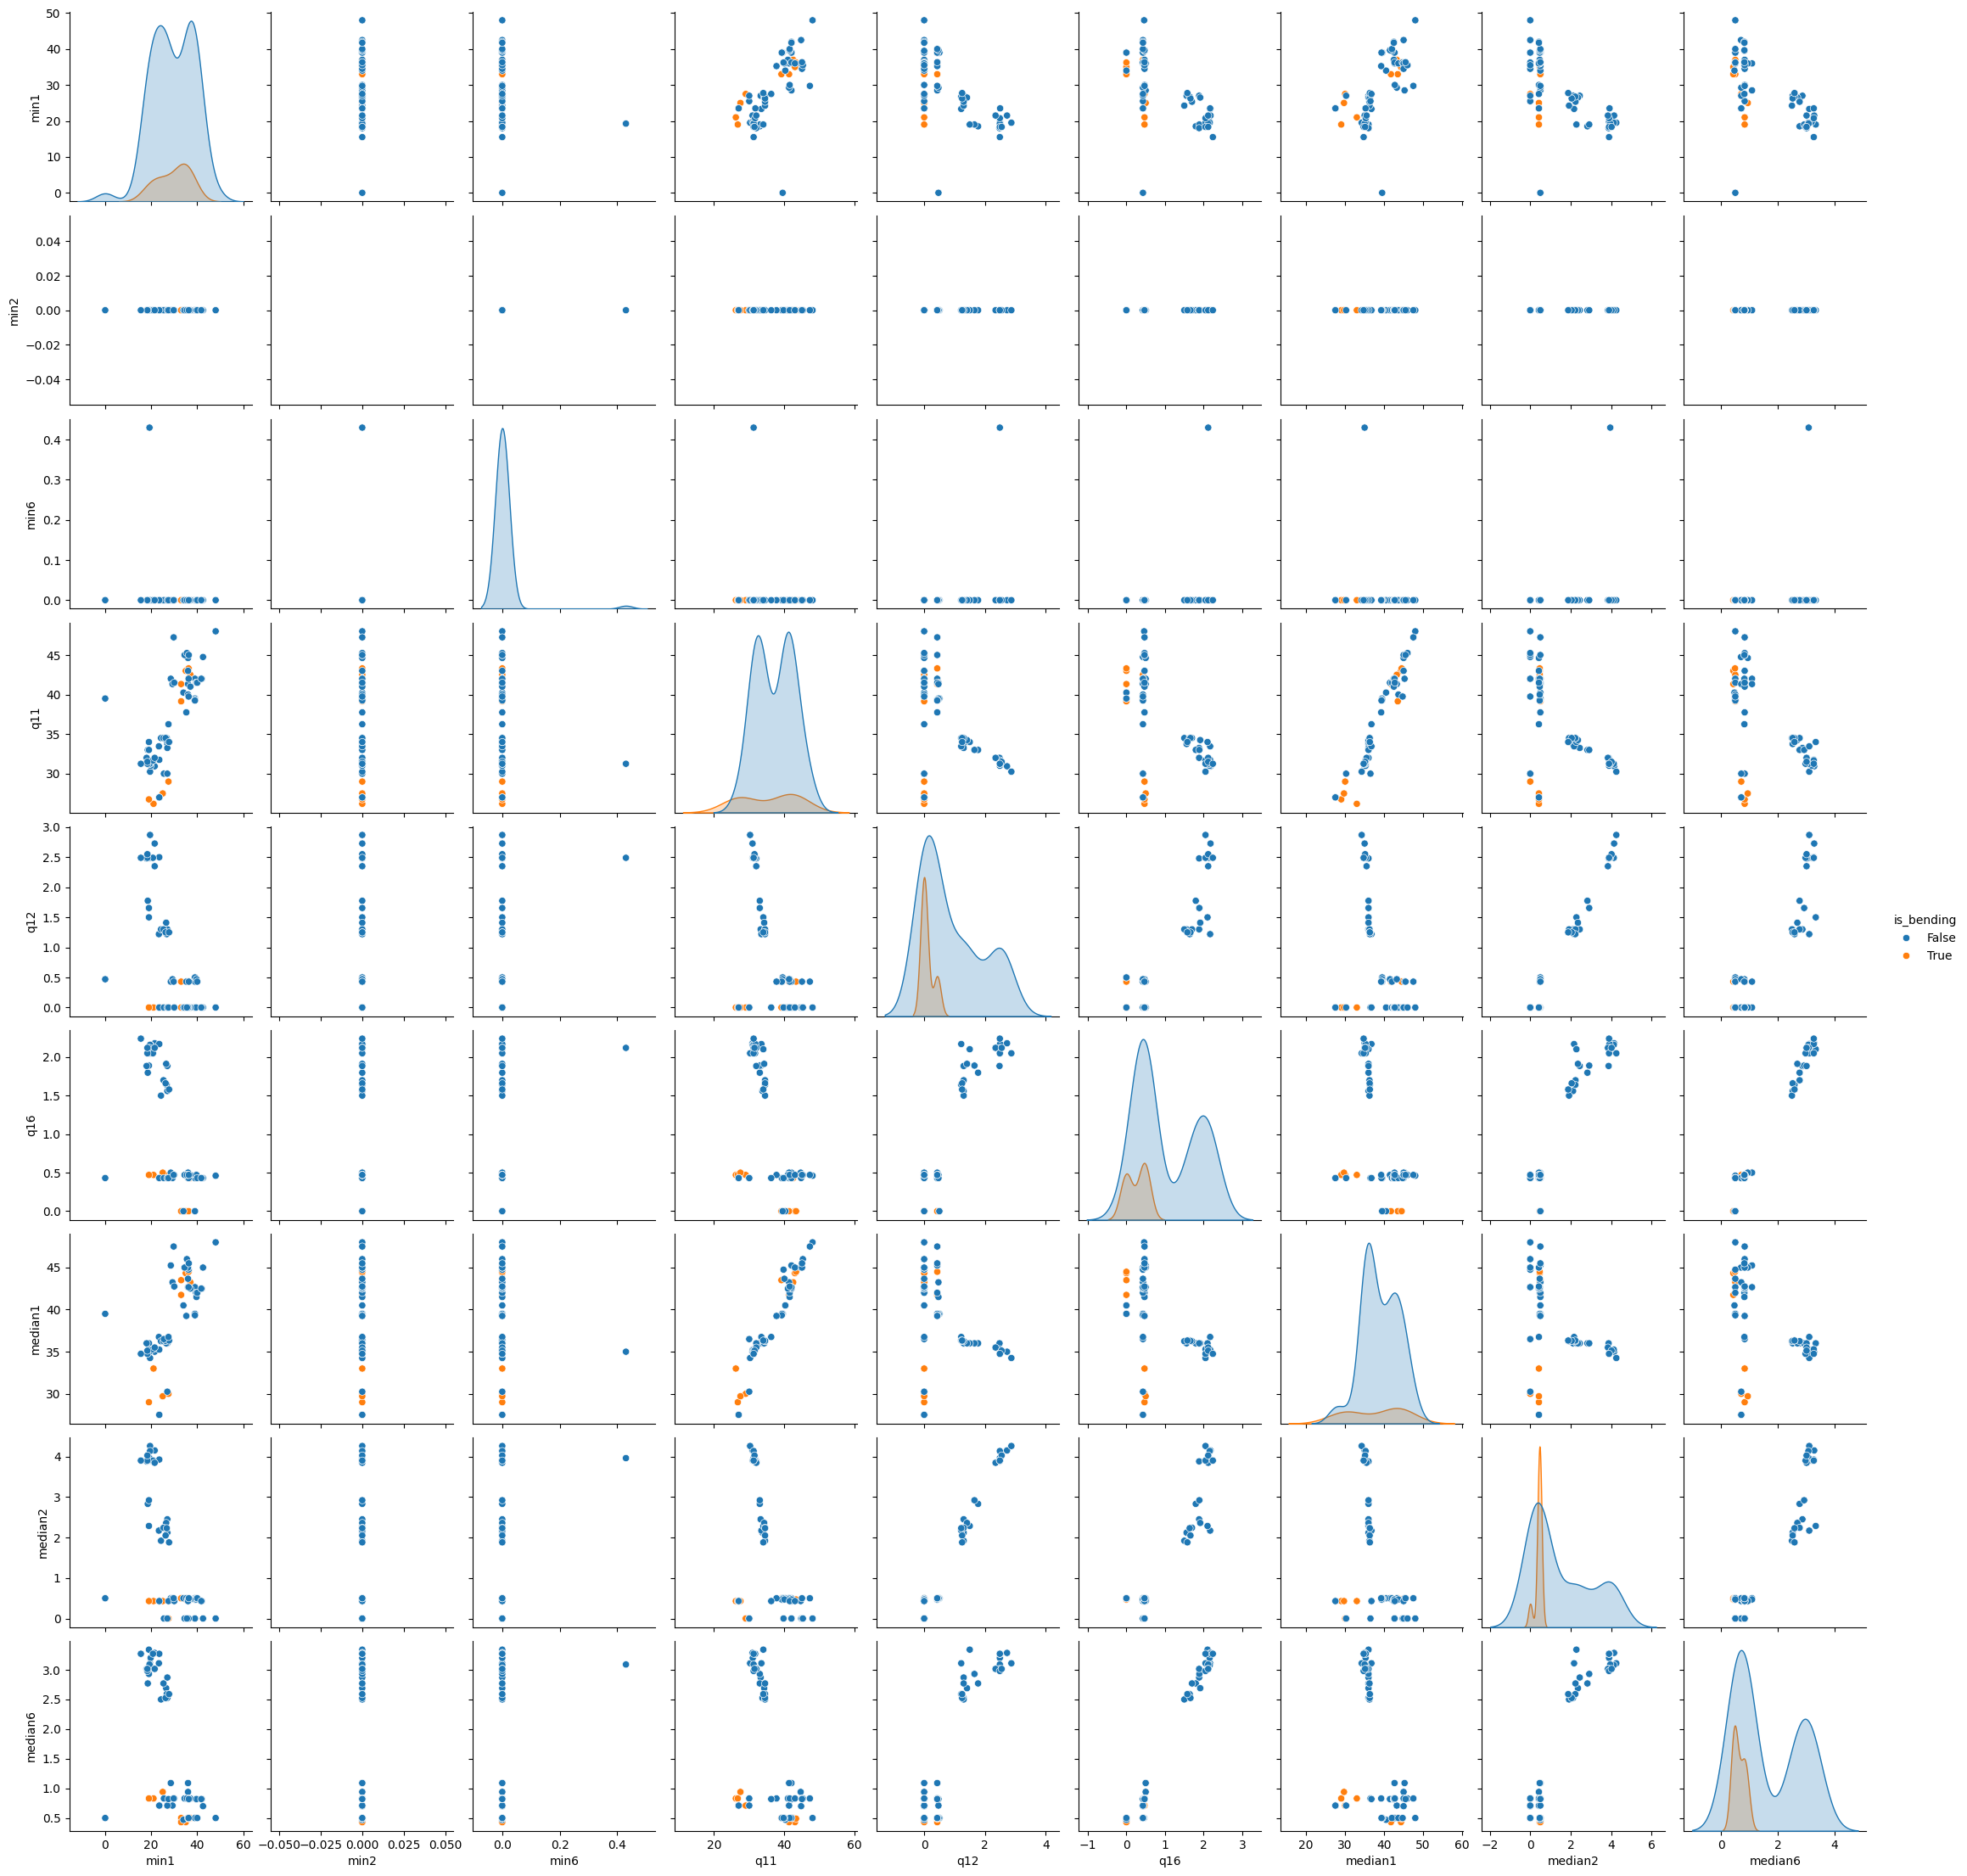

In [11]:
pairplot=sns.pairplot(df_train_plot,vars=selected_columns,hue='is_bending')
plt.show()

## 4. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 3(c)v, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 3(c)v?

Still use the three features I selected are min, q1, and median

In [12]:
all_file_features_split=[]

for idx,files in df_info.iterrows():
    filepath=os.path.join(DATA_ROOT,files['folder'],files['filename'])
    #print(filepath)
    if os.path.join(files['folder'],files['filename'])=='bending2/dataset4.csv':
      df=pd.read_csv(filepath,skiprows=4,sep='\s+',engine='python')
    else:
      df=pd.read_csv(filepath,skiprows=4,sep=',')
    df=df.iloc[:,1:]  #drop first col(Columns: time)
    #print(df.head())

    half=df.shape[0]//2
    df1=df.iloc[:half,:]
    df2=df.iloc[half:,:]

    file_features={}
    for i,col in enumerate(df.columns):
        x1=df1[col].values
        x2=df2[col].values
        file_features[f'min{i+1}_1']=np.min(x1)
        file_features[f'min{i+1}_2']=np.min(x2)
        file_features[f'q1{i+1}_1']=np.percentile(x1, 25)
        file_features[f'q1{i+1}_2']=np.percentile(x2, 25)
        file_features[f'median{i+1}_1']=np.median(x1)
        file_features[f'median{i+1}_2']=np.median(x2)
    file_features['label']=files['folder']
    file_features['filename']=files['filename']
    file_features['is_test']=files['is_test']

    all_file_features_split.append(file_features)

df_features_split=pd.DataFrame(all_file_features_split)
df_features_split


,min1_1,min1_2,q11_1,q11_2,median1_1,median1_2,min2_1,min2_2,q12_1,q12_2,...,median5_2,min6_1,min6_2,q16_1,q16_2,median6_1,median6_2,label,filename,is_test
0,38.00,37.25,40.3100,39.0000,41.250,39.415,0.0,0.00,0.0000,0.0000,...,35.415,0.00,0.00,0.0000,0.00,0.000,0.430,bending1,dataset1.csv,True
1,41.75,38.00,42.0000,42.0000,42.500,43.375,0.0,0.00,0.0000,0.0000,...,32.000,0.00,0.00,0.0000,0.00,0.430,0.430,bending1,dataset2.csv,True
2,36.50,35.00,43.2500,43.0000,44.500,43.500,0.0,0.00,0.0000,0.4300,...,36.000,0.00,0.00,0.0000,0.00,0.500,0.000,bending1,dataset3.csv,False
3,33.75,33.00,42.0000,37.7500,45.000,42.000,0.0,0.00,0.0000,0.0000,...,30.415,0.00,0.00,0.0000,0.00,0.765,0.470,bending1,dataset4.csv,False
4,33.00,39.25,39.6525,41.5000,42.330,41.500,0.0,0.00,0.4300,0.4300,...,29.750,0.00,0.00,0.0000,0.00,0.430,0.430,bending1,dataset5.csv,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,22.33,20.75,32.0000,31.0000,35.500,35.000,0.0,0.43,2.4800,2.4975,...,16.000,0.00,0.00,1.7975,2.17,3.035,3.350,walking,dataset5.csv,False
84,21.50,21.75,32.0000,32.1875,35.500,35.585,0.0,0.00,2.3750,2.2900,...,16.250,0.00,0.00,2.1800,2.05,3.000,3.085,walking,dataset6.csv,False
85,18.33,20.33,30.4575,31.7300,34.375,35.000,0.0,0.00,2.4900,2.4900,...,15.875,0.43,0.00,2.0500,2.05,3.015,2.955,walking,dataset7.csv,False
86,18.33,22.67,32.0000,31.4575,35.750,35.000,0.0,0.00,2.4500,2.6900,...,16.000,0.00,0.47,2.0600,2.17,2.870,3.110,walking,dataset8.csv,False


In [13]:
df_train_split=df_features_split[df_features_split['is_test']==False].copy()
df_train_split['is_bending']=df_train_split['label'].str.contains('bending')
df_train_split


,min1_1,min1_2,q11_1,q11_2,median1_1,median1_2,min2_1,min2_2,q12_1,q12_2,...,min6_1,min6_2,q16_1,q16_2,median6_1,median6_2,label,filename,is_test,is_bending
2,36.50,35.00,43.2500,43.0000,44.500,43.500,0.0,0.00,0.0000,0.4300,...,0.00,0.00,0.0000,0.0000,0.500,0.000,bending1,dataset3.csv,False,True
3,33.75,33.00,42.0000,37.7500,45.000,42.000,0.0,0.00,0.0000,0.0000,...,0.00,0.00,0.0000,0.0000,0.765,0.470,bending1,dataset4.csv,False,True
4,33.00,39.25,39.6525,41.5000,42.330,41.500,0.0,0.00,0.4300,0.4300,...,0.00,0.00,0.0000,0.0000,0.430,0.430,bending1,dataset5.csv,False,True
5,39.00,37.00,43.5000,42.5000,45.000,42.670,0.0,0.00,0.0000,0.4300,...,0.00,0.00,0.4300,0.4300,0.710,0.500,bending1,dataset6.csv,False,True
6,36.67,36.25,42.3300,44.2500,43.710,44.500,0.0,0.00,0.0000,0.4300,...,0.00,0.00,0.0000,0.4225,0.470,0.500,bending1,dataset7.csv,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,22.33,20.75,32.0000,31.0000,35.500,35.000,0.0,0.43,2.4800,2.4975,...,0.00,0.00,1.7975,2.1700,3.035,3.350,walking,dataset5.csv,False,False
84,21.50,21.75,32.0000,32.1875,35.500,35.585,0.0,0.00,2.3750,2.2900,...,0.00,0.00,2.1800,2.0500,3.000,3.085,walking,dataset6.csv,False,False
85,18.33,20.33,30.4575,31.7300,34.375,35.000,0.0,0.00,2.4900,2.4900,...,0.43,0.00,2.0500,2.0500,3.015,2.955,walking,dataset7.csv,False,False
86,18.33,22.67,32.0000,31.4575,35.750,35.000,0.0,0.00,2.4500,2.6900,...,0.00,0.47,2.0600,2.1700,2.870,3.110,walking,dataset8.csv,False,False


Break each time series in training set into two time series
for the fisrt part of time series:


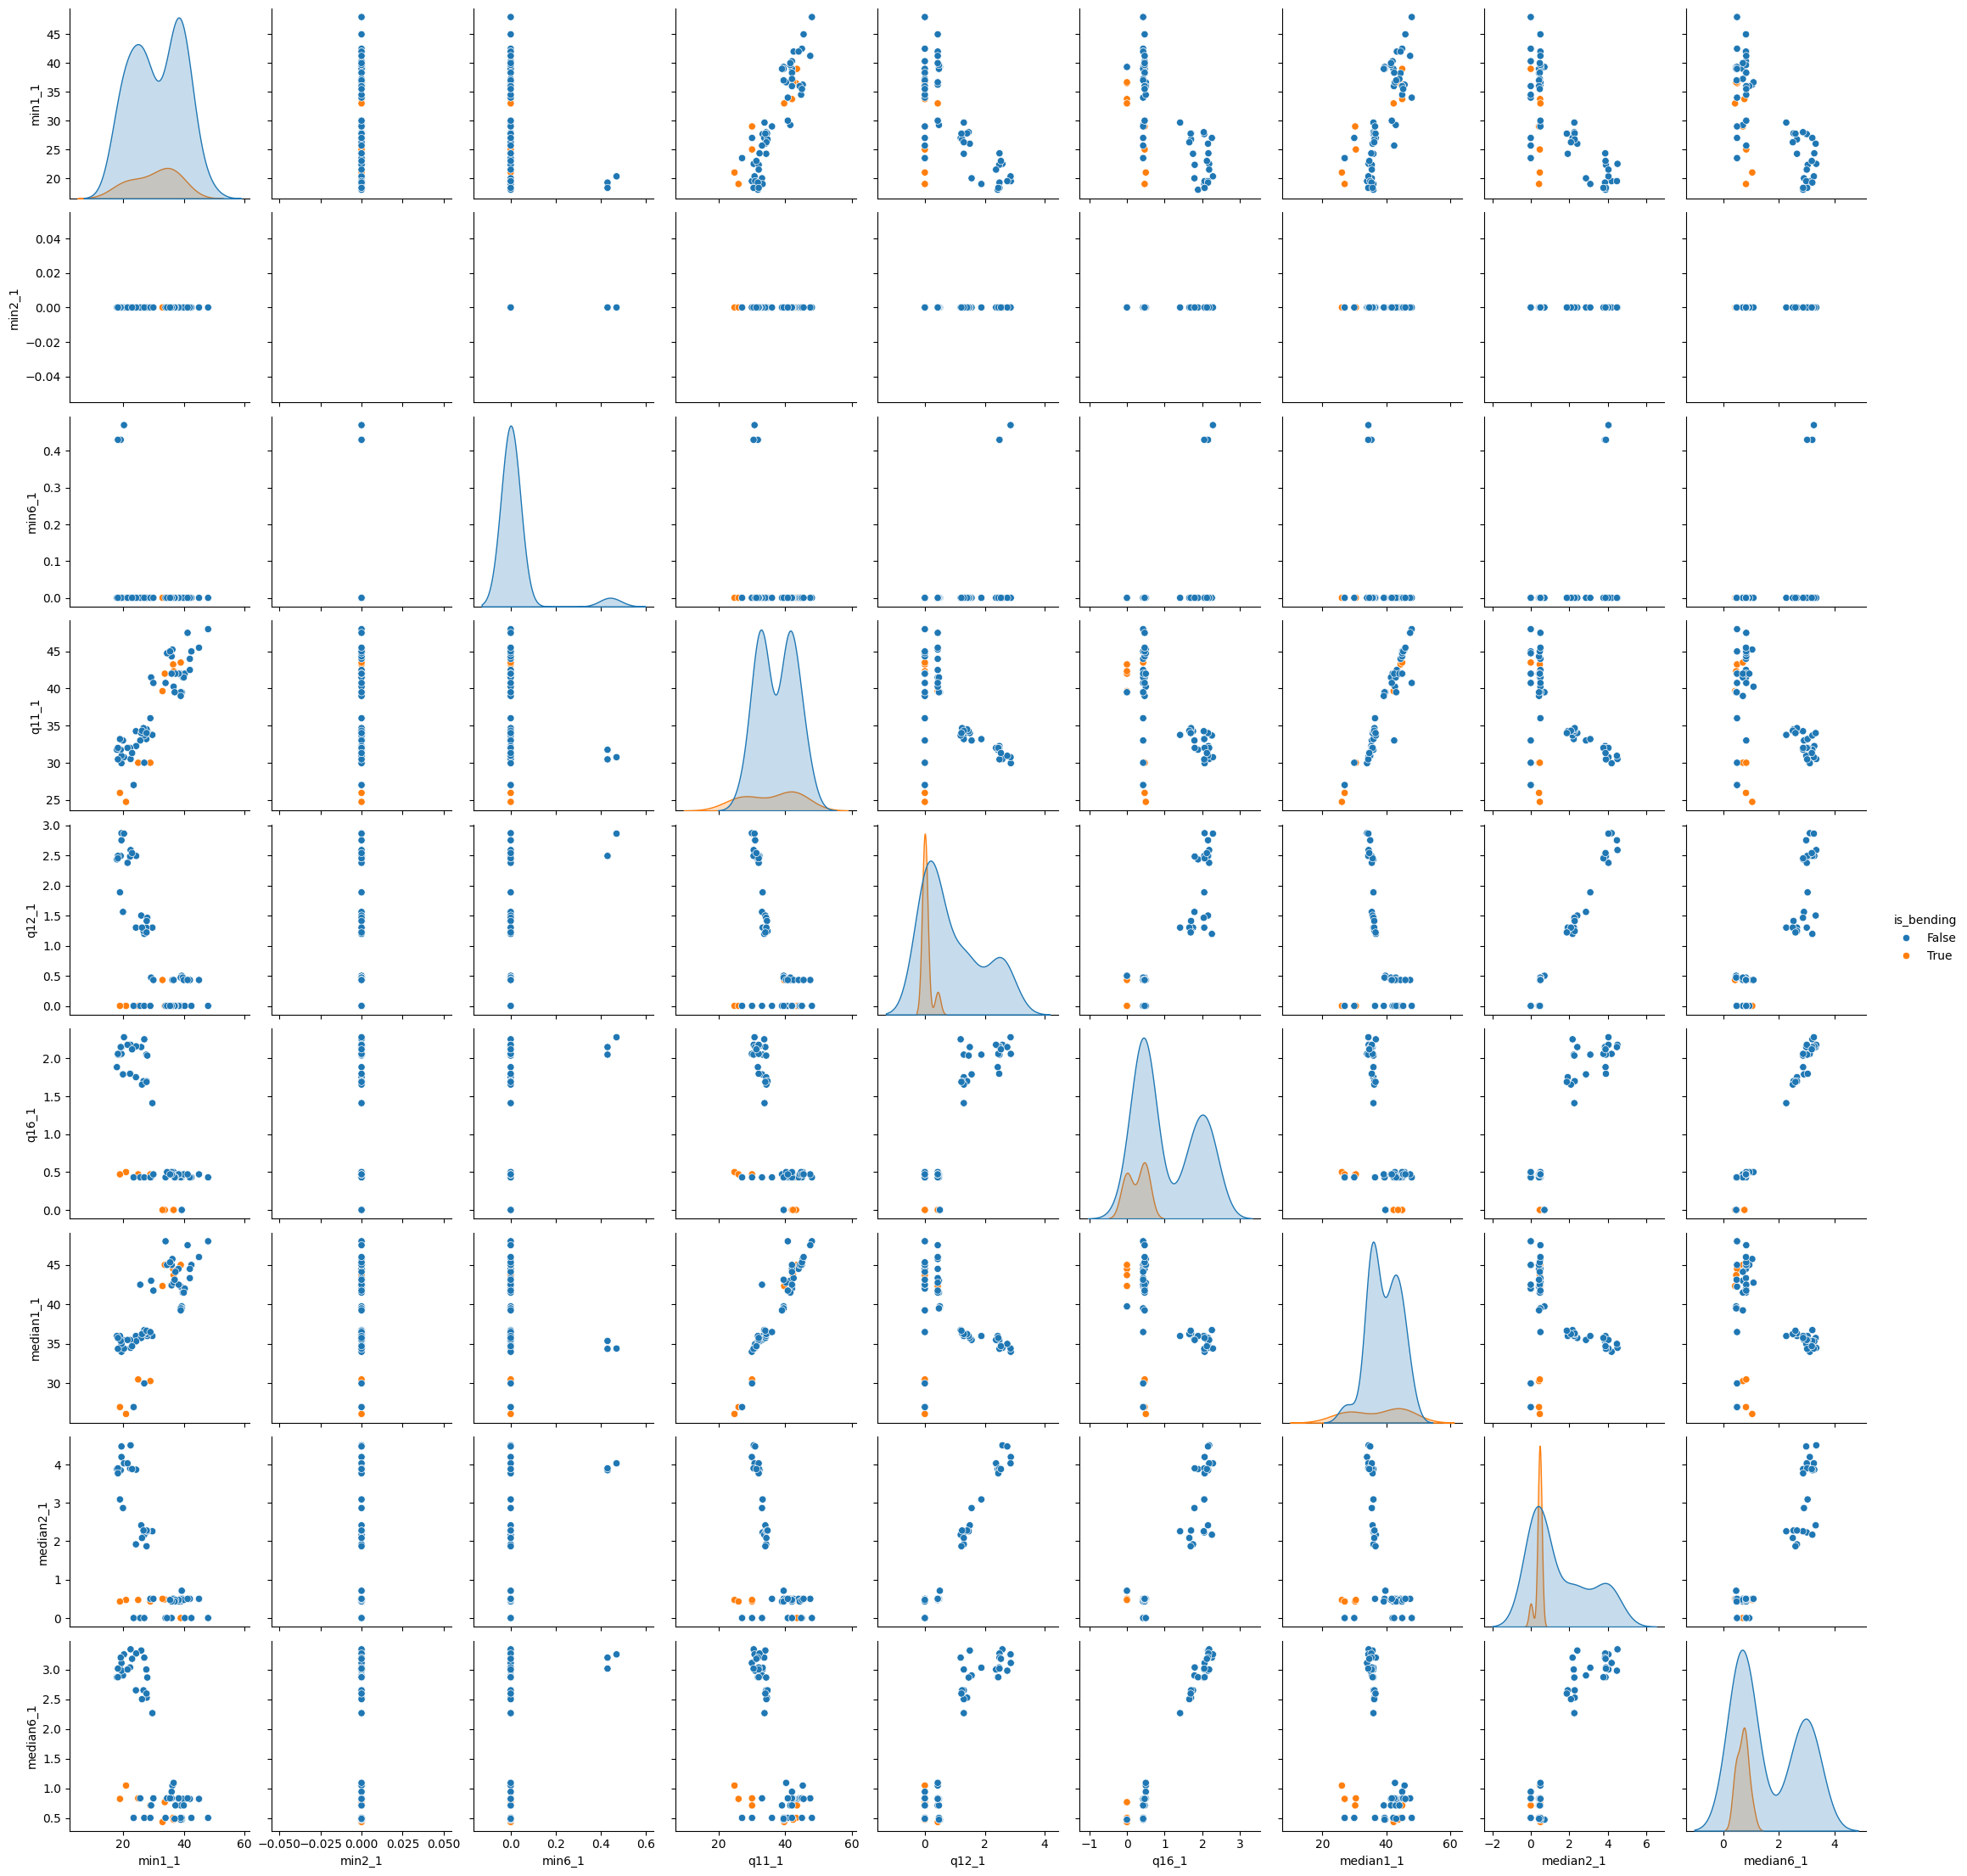

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns_split1=['min1_1','min2_1','min6_1','q11_1','q12_1','q16_1','median1_1','median2_1','median6_1']
df_train_plot_split1=df_train_split[selected_columns_split1+['is_bending']].copy()
#df_train_plot_split1

print("Break each time series in training set into two time series")
print("for the fisrt part of time series:")
pairplot_split1=sns.pairplot(df_train_plot_split1,vars=selected_columns_split1,hue='is_bending')
plt.show()


for the second part of time series:


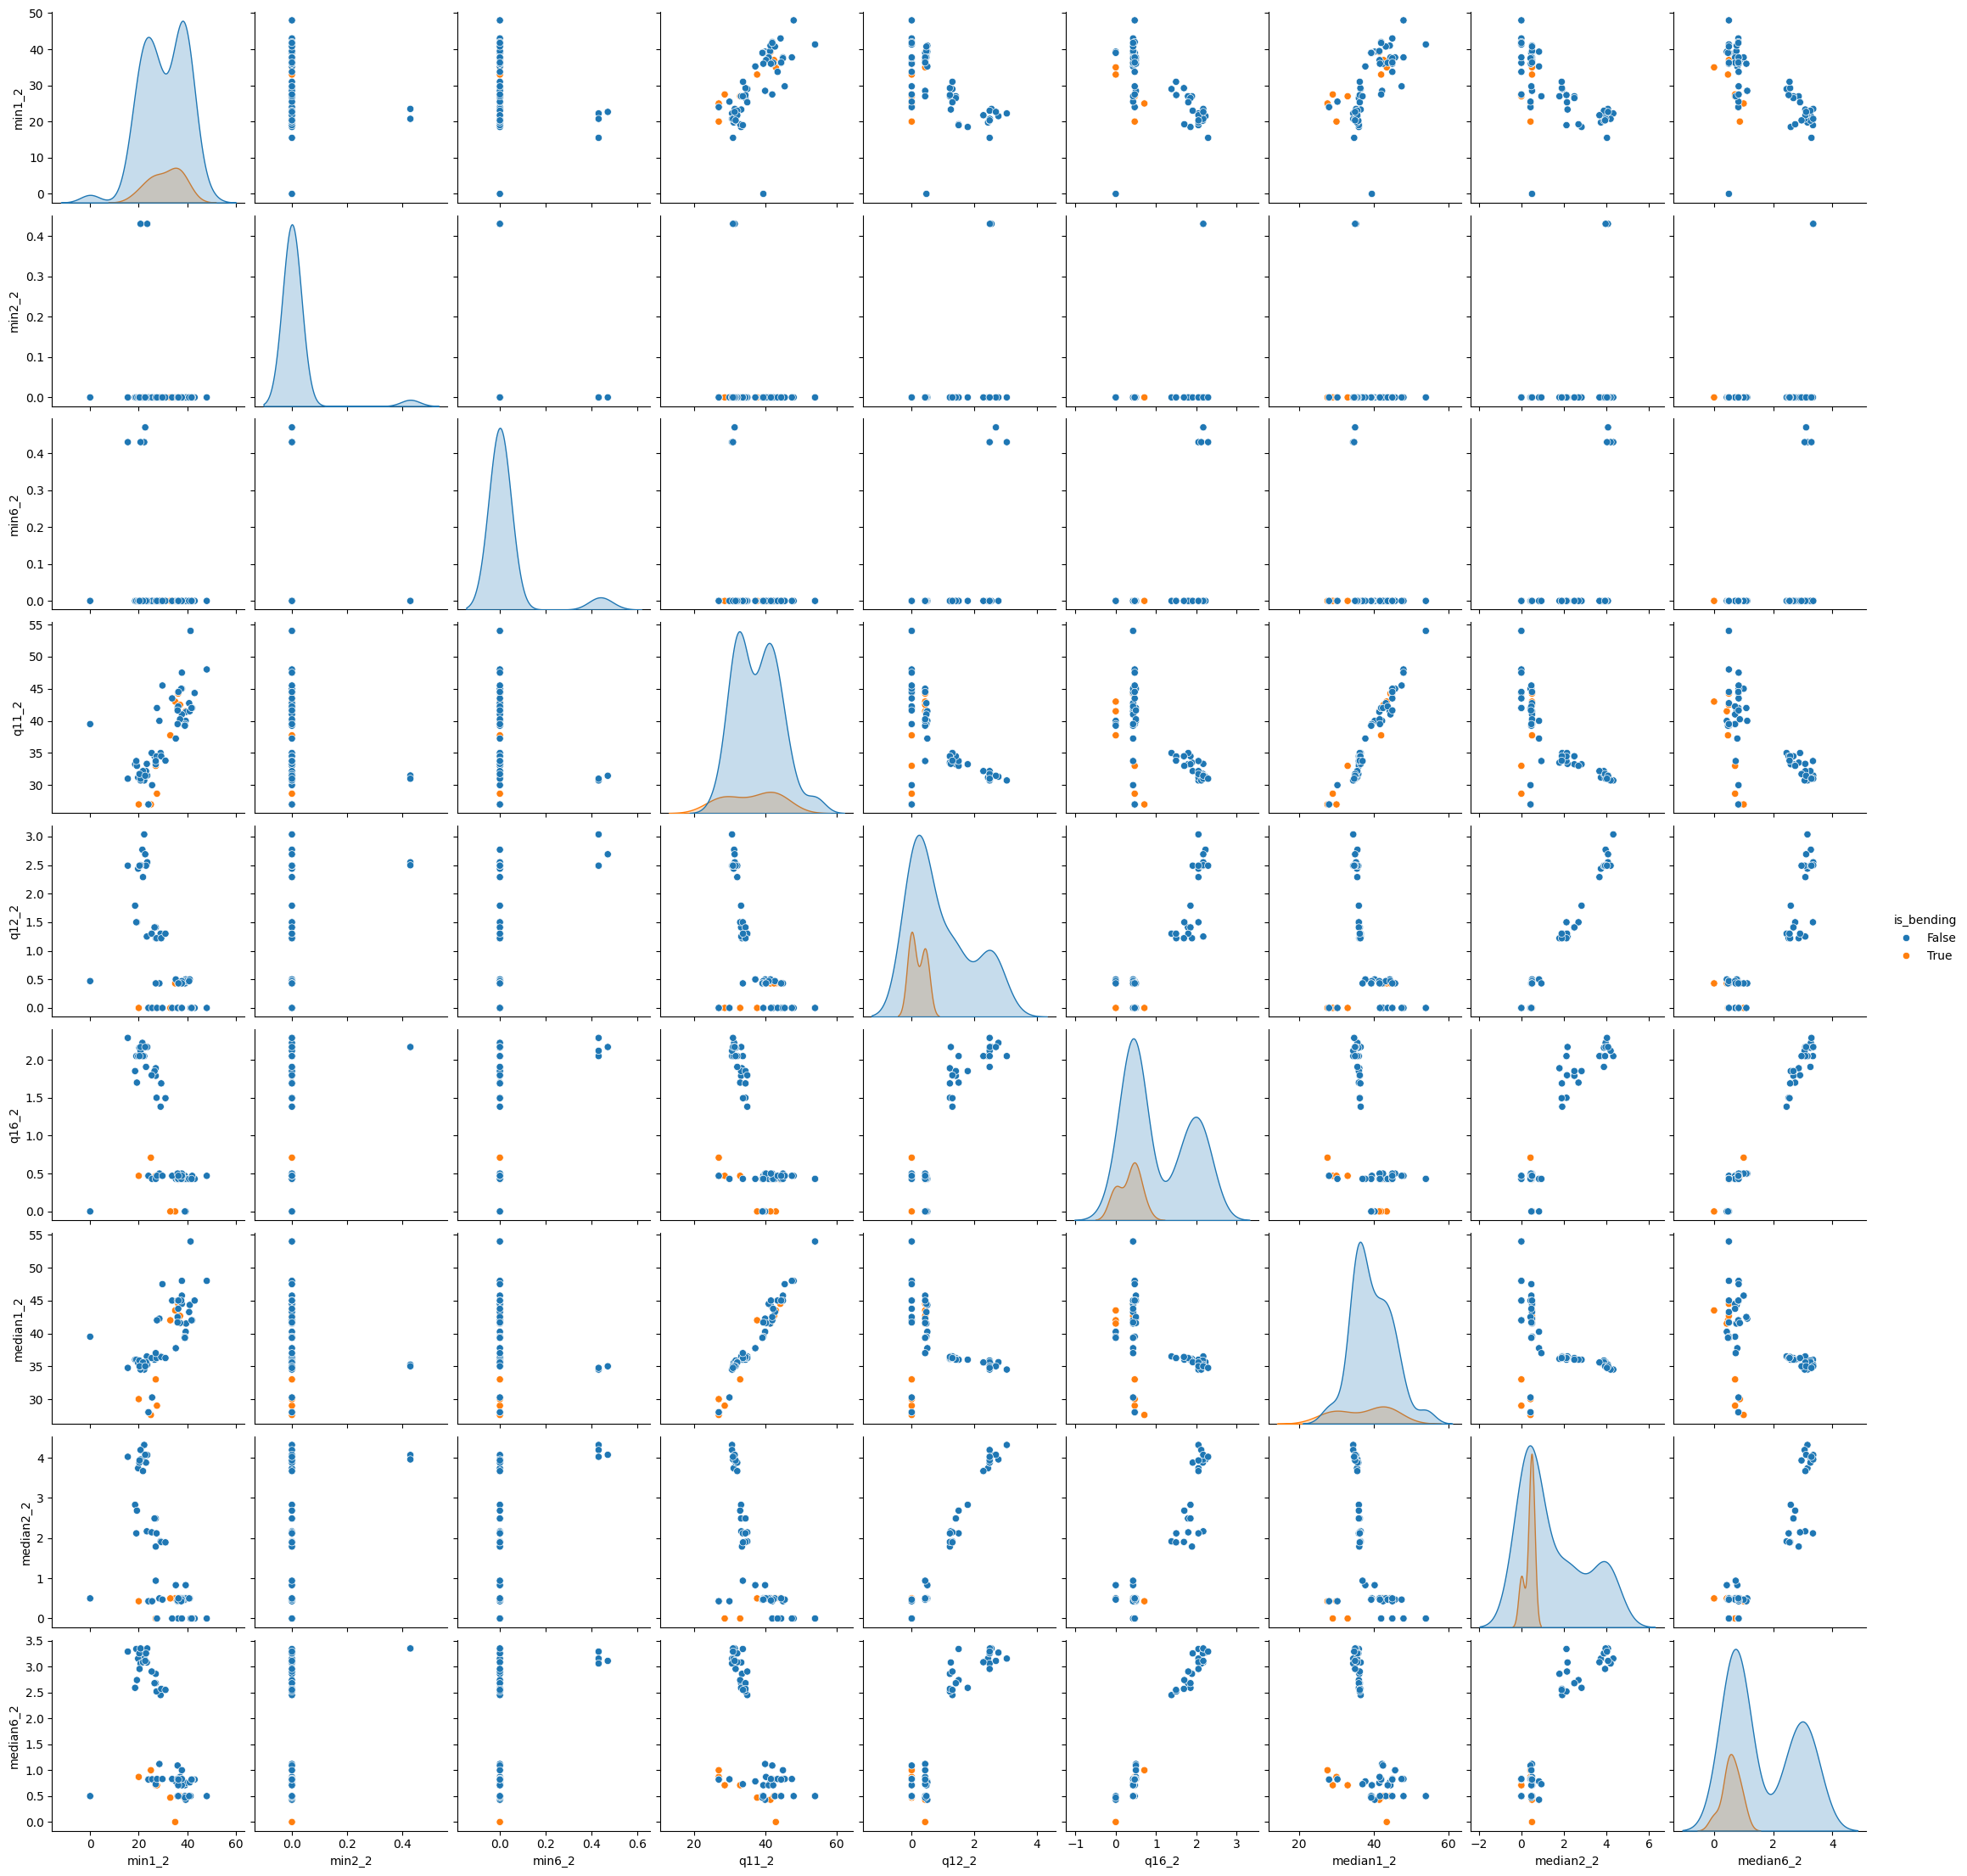

In [15]:
selected_columns_split2=['min1_2','min2_2','min6_2','q11_2','q12_2','q16_2','median1_2','median2_2','median6_2']
df_train_plot_split2=df_train_split[selected_columns_split2+['is_bending']].copy()
#df_train_plot_split2

print("for the second part of time series:")
pairplot_split2=sns.pairplot(df_train_plot_split2,vars=selected_columns_split2,hue='is_bending')
plt.show()

Yes, there are some differences between the scatter plots generated from the split time series and those in 3(c)v.
1. The features extracted from the first half of the time series exhibit similar or slightly better class separability compared to the unsplit time series. For example, features such as min1_1, and q11_1 show clear separation between bending and other activities.

2. In the second half, the separation becomes less pronounced. Bending samples tend to overlap more with the rest, indicating that the second part of the time series may carry less discriminative information.

Overall, splitting the time series helps analyze how different temporal segments contribute to class separation, and the first half seems to retain more useful patterns for distinguishing bending.

#### ii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of appoximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.8 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.

In [ ]:
def extract_features_by_l(l=1):
    all_file_features_l=[]

    for _, row in df_info.iterrows():
        filepath=os.path.join(DATA_ROOT, row['folder'], row['filename'])
        if os.path.join(row['folder'], row['filename']) == 'bending2/dataset4.csv':
            df=pd.read_csv(filepath, skiprows=4, sep='\s+', engine='python')
        else:
            df=pd.read_csv(filepath, skiprows=4, sep=',')

        df=df.iloc[:, 1:]  #drop time

        T=len(df)
        segment_len=T // l

        file_features={}

        for i, col in enumerate(df.columns):
            for j in range(l):
                start=j * segment_len
                end=(j + 1) * segment_len if j < l - 1 else T
                segment=df[col].iloc[start:end]
                suffix=f'{i+1}_{j+1}'

                file_features[f'min{suffix}']=np.min(segment)
                file_features[f'q1{suffix}']=np.percentile(segment, 25)
                file_features[f'median{suffix}']=np.median(segment)

        file_features['label']=row['folder']
        file_features['filename']=row['filename']
        file_features['is_test']=row['is_test']

        all_file_features_l.append(file_features)

    return pd.DataFrame(all_file_features_l)

#df_features_l2=extract_features_by_l(l=2)
#df_features_l2

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.pipeline import Pipeline

In this question, I used Recursive Feature Elimination (RFE) to select important features by iteratively removing the least important ones based on the model's coefficients.

Given the limited number of training instances (n = 69), I decided to restrict the number of selected features (p ≤ 20) to avoid overfitting and multicollinearity.

In [18]:
# restrict rfe keep ratio
"""
RFE_KEEP_RATIO = 0.1

def train_model_with_rfe(df_info):
    best_params = {'l': None, 'p': None, 'f1': -1, 'acc': -1}
    results = []
    for l in range(1, 21):
        df_features = extract_features_by_l(l=l)
        df_train = df_features[df_features['is_test'] == False].copy()
        X = df_train.drop(['label', 'filename', 'is_test'], axis=1)
        y = (df_train['label'].str.contains('bending')).astype(int)

        #5-fold
        skf = StratifiedKFold(n_splits=5 , shuffle=True, random_state=42)
        fold_metrics = []
        fold_p = []

        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
            pipeline = Pipeline([
                ('feature_selector', RFE(
                    estimator=LogisticRegression(max_iter=1000),
                    n_features_to_select=int(X_train.shape[1] * RFE_KEEP_RATIO),
                    step=0.1
                )),
                ('classifier', LogisticRegression(max_iter=1000))
            ])
            pipeline.fit(X_train, y_train)

            selected_features = pipeline.named_steps['feature_selector'].support_
            current_p = sum(selected_features)

            y_pred = pipeline.predict(X_val)
            fold_metrics.append({
                'f1': f1_score(y_val, y_pred),
                'acc': accuracy_score(y_val, y_pred)
            })
            fold_p.append(current_p)

        avg_f1 = np.mean([m['f1'] for m in fold_metrics])
        avg_acc = np.mean([m['acc'] for m in fold_metrics])
        avg_p = int(np.mean(fold_p))

        if avg_f1 > best_params['f1']:
            best_params.update({
                'l': l,
                'p': avg_p,
                'f1': avg_f1,
                'acc': avg_acc
            })

        print(f"l={l:2d} | p={avg_p:3d} | F1={avg_f1:.4f} | Acc={avg_acc:.4f}")

    print("\n===== best parameter =====")
    print(f"best l: {best_params['l']}")
    print(f"best p: {best_params['p']}")
    print(f"F1 score: {best_params['f1']:.4f}")
    print(f"Accuracy: {best_params['acc']:.4f}")

    return best_params

#rfe_final_params = train_model_with_rfe(df_info)
"""

'\nRFE_KEEP_RATIO = 0.1\n\ndef train_model_with_rfe(df_info):\n    best_params = {\'l\': None, \'p\': None, \'f1\': -1, \'acc\': -1}\n    results = []\n    for l in range(1, 21):\n        df_features = extract_features_by_l(l=l)\n        df_train = df_features[df_features[\'is_test\'] == False].copy()\n        X = df_train.drop([\'label\', \'filename\', \'is_test\'], axis=1)\n        y = (df_train[\'label\'].str.contains(\'bending\')).astype(int)\n\n        #5-fold\n        skf = StratifiedKFold(n_splits=5 , shuffle=True, random_state=42)\n        fold_metrics = []\n        fold_p = []\n\n        for train_idx, val_idx in skf.split(X, y):\n            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]\n            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]\n            pipeline = Pipeline([\n                (\'feature_selector\', RFE(\n                    estimator=LogisticRegression(max_iter=1000),\n                    n_features_to_select=int(X_train.shape[1] * RFE_KEEP_RAT

In [ ]:
def train_model_with_rfe_grid(df_info):
    best_params={'l': None, 'p': None, 'f1': -1, 'acc': -1}

    for l in range(1, 21):  # l from 1 to 20
        df_features=extract_features_by_l(l=l)
        df_train=df_features[df_features['is_test'] == False].copy()

        X=df_train.drop(['label', 'filename', 'is_test'], axis=1)
        y=(df_train['label'].str.contains('bending')).astype(int)

        best_p_for_l={'p': None, 'f1': -1, 'acc': -1}
        for p in range(1,21):
            if p >= X.shape[1]:
                continue

            skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            f1_scores, acc_scores=[], []

            for train_idx, val_idx in skf.split(X, y):
                X_train, X_val=X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val=y.iloc[train_idx], y.iloc[val_idx]

                pipeline=Pipeline([
                    ('feature_selector', RFE(
                        estimator=LogisticRegression(max_iter=1000),
                        n_features_to_select=p,
                        step=0.1
                    )),
                    ('classifier', LogisticRegression(max_iter=1000))
                ])
                pipeline.fit(X_train, y_train)
                y_pred=pipeline.predict(X_val)

                f1_scores.append(f1_score(y_val, y_pred))
                acc_scores.append(accuracy_score(y_val, y_pred))

            avg_f1=np.mean(f1_scores)
            avg_acc=np.mean(acc_scores)

            if avg_f1 > best_p_for_l['f1'] and avg_f1!=1 :
                best_p_for_l.update({
                    'p': p,
                    'f1': avg_f1,
                    'acc': avg_acc
                })

        print(f"when l={l:2d} | best p={best_p_for_l['p']:2d} | F1={best_p_for_l['f1']:.4f} | Acc={best_p_for_l['acc']:.4f}")

        if best_p_for_l['f1'] > best_params['f1']:
            best_params.update({
                'l': l,
                'p': best_p_for_l['p'],
                'f1': best_p_for_l['f1'],
                'acc': best_p_for_l['acc']
            })

    print("\n===== Best (l, p) across all =====")
    print(f"Best l: {best_params['l']}")
    print(f"Best p: {best_params['p']}")
    print(f"F1 Score: {best_params['f1']:.4f}")
    print(f"Accuracy: {best_params['acc']:.4f}")

    return best_params

In [ ]:
rfe_final_params=train_model_with_rfe_grid(df_info)

when l= 1 | best p= 3 | F1=0.6000 | Acc=0.9286
when l= 2 | best p= 1 | F1=0.7333 | Acc=0.9418
when l= 3 | best p= 1 | F1=0.8267 | Acc=0.9571
when l= 4 | best p=11 | F1=0.7333 | Acc=0.9571
when l= 5 | best p= 3 | F1=0.8333 | Acc=0.9429
when l= 6 | best p= 2 | F1=0.7600 | Acc=0.9429
when l= 7 | best p=10 | F1=0.6667 | Acc=0.9560
when l= 8 | best p= 1 | F1=0.7267 | Acc=0.9286
when l= 9 | best p= 6 | F1=0.7867 | Acc=0.9429
when l=10 | best p= 3 | F1=0.7333 | Acc=0.9703
when l=11 | best p= 3 | F1=0.8667 | Acc=0.9714
when l=12 | best p= 4 | F1=0.9600 | Acc=0.9857
when l=13 | best p= 3 | F1=0.7333 | Acc=0.9703
when l=14 | best p=18 | F1=0.6667 | Acc=0.9560
when l=15 | best p=15 | F1=0.6667 | Acc=0.9560
when l=16 | best p=17 | F1=0.9333 | Acc=0.9857
when l=17 | best p=12 | F1=0.9333 | Acc=0.9857
when l=18 | best p= 5 | F1=0.9333 | Acc=0.9857
when l=19 | best p= 9 | F1=0.9333 | Acc=0.9857
when l=20 | best p= 9 | F1=0.9333 | Acc=0.9857

===== Best (l, p) across all =====
Best l: 12
Best p: 4
F1 

In [ ]:
best_l=rfe_final_params['l']

df_full_features=extract_features_by_l(l=best_l)
df_train_full=df_full_features[df_full_features['is_test'] == False]

X_full=df_train_full.drop(['label', 'filename', 'is_test'], axis=1)
y_full=(df_train_full['label'].str.contains('bending')).astype(int)

selector=RFE(
    LogisticRegression(max_iter=1000),
    n_features_to_select=rfe_final_params['p'],
    step=0.1
)
X_selected=selector.fit_transform(X_full, y_full)

final_model=LogisticRegression(max_iter=1000).fit(X_selected, y_full)

Correct cross-validation practice should be performing feature selection independently within each fold in the training data. The same selection rule is then applied to the validation set. This prevents data leakage, ensuring that the validation set does not influence feature selection or model training.

Incorrect practice would be performing feature selection on the entire dataset before cross-validation. This introduces information from the validation set into the training process, causing data leakage and overfitting. It leads to overly optimistic performance estimates.

#### iii. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi's as well as the p-values associated with them.

I encountered a singular matrix error while fitting the model, which was likely caused by strong correlations between some features. To fix this, I first examined the correlation matrix and dropped highly correlated features before running feature selection again.

In [ ]:
import statsmodels.api as sm

X_with_const=sm.add_constant(X_selected)
rank=np.linalg.matrix_rank(X_with_const)
print(f"Matrix Rank: {rank}, Columns: {X_with_const.shape[1]}")

Matrix Rank: 5, Columns: 5


In [24]:
# drop some correlated features, make rank = # of columns

#corr = pd.DataFrame(X_with_const).corr()
#high_corr = corr[(corr.abs() > 0.97) & (corr.abs() < 1.0)]
#display(high_corr.dropna(how='all').dropna(axis=1, how='all'))

#upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# drop the colums which have correlated > 0.9535
#to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9535)]
#X_with_const_cleaned = pd.DataFrame(X_with_const).drop(columns=to_drop)
#X_with_const_cleaned

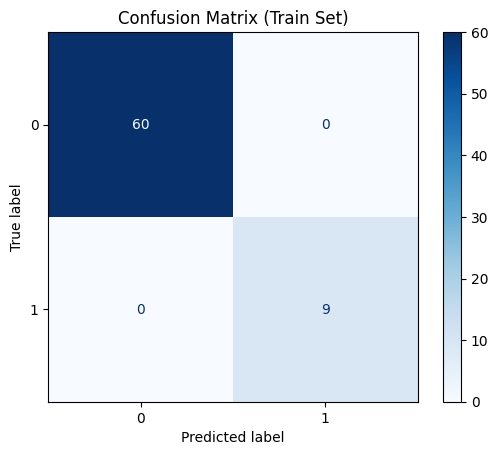

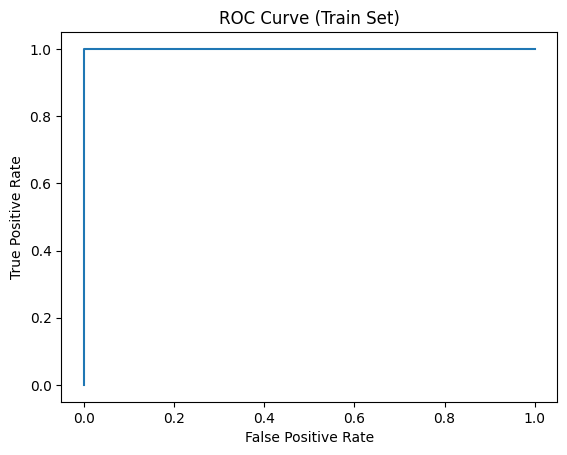

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import statsmodels.api as sm

y_pred=final_model.predict(X_selected)
cm=confusion_matrix(y_full, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Train Set)")
plt.show()

y_proba=final_model.predict_proba(X_selected)[:, 1]
fpr, tpr, thresholds=roc_curve(y_full, y_proba)
auc=roc_auc_score(y_full, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Train Set)")
plt.show()

In [ ]:
model_glm=sm.GLM(y_full, X_with_const, family=sm.families.Binomial())
result=model_glm.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                   69
Model:                            GLM   Df Residuals:                       64
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.5198e-09
Date:                Fri, 18 Apr 2025   Deviance:                   5.0397e-09
Time:                        20:00:35   Pearson chi2:                 2.52e-09
No. Iterations:                    25   Pseudo R-squ. (CS):             0.5390
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -251.8487   1.73e+05     -0.001      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


While reporting the β coefficients and p-values using statsmodels.GLM, we observed a Perfect Separation Warning. Although I already limited the maximum number of features retained by rfe, the issue still occurs, and the resulting p-values are almost all close to 1.

#### iv. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [ ]:
df_test=extract_features_by_l(l=best_l)
#print(best_l)
df_test=df_test[df_test['is_test'] == True].copy()

X_test=df_test.drop(['label', 'filename', 'is_test'], axis=1)
#print(X_test)
y_test=(df_test['label'].str.contains('bending')).astype(int)
#print(y_test)

#use the same features
X_test_selected=selector.transform(X_test)
#print(X_test_selected)

y_pred_test=final_model.predict(X_test_selected)
test_acc=accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", test_acc)
print("Cross-validation Accuracy:", rfe_final_params['acc'])


Test Accuracy: 0.9473684210526315
Cross-validation Accuracy: 0.9857142857142858


I tested the classifier on the test set by breaking each time series into l = 12 segments, same as best l in training set. Then I applied RFE to select the top p = 5 features based on previous result.

The model achieved a test accuracy of 0.947, which is close to the cross-validation accuracy of 0.986.
This suggests that the model generalizes well to unseen data and confirms the effectiveness of our chosen values of l and p.

#### v. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes, I think the two classes are quite well separated. Even though I already limited the number of features selected by RFE, I still got a Perfect Separation Warning when using statsmodels.GLM. Also, most of the p-values were very close to 1. So I think this means the model can easily separate the two classes, which makes the parameter estimation unstable.

#### vi. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Yes, the previous confusion matrix shows that the training set contains only 9 bending samples and 60 non-bending samples, which indicates class imbalance.

In [ ]:
X=X_full.copy()
X['label']=y_full.values

pos=X[X['label'] == 1]
neg=X[X['label'] == 0]

neg_sampled=neg.sample(n=len(pos), random_state=42) #select same # of negtive sample in training set

df_case_control=pd.concat([pos, neg_sampled])
X_cc=df_case_control.drop('label', axis=1)
y_cc=df_case_control['label']

model_cc=LogisticRegression(max_iter=1000)
model_cc.fit(X_cc, y_cc)

LogisticRegression(max_iter=1000)

for training set:


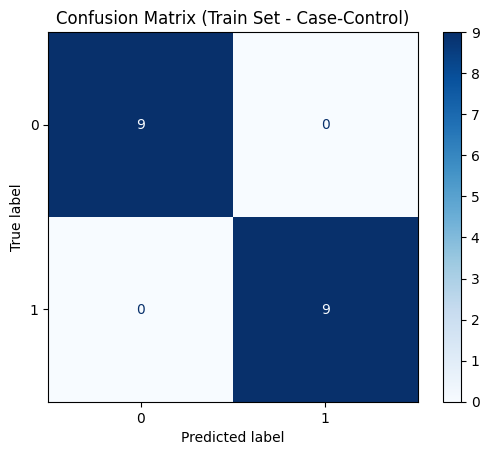

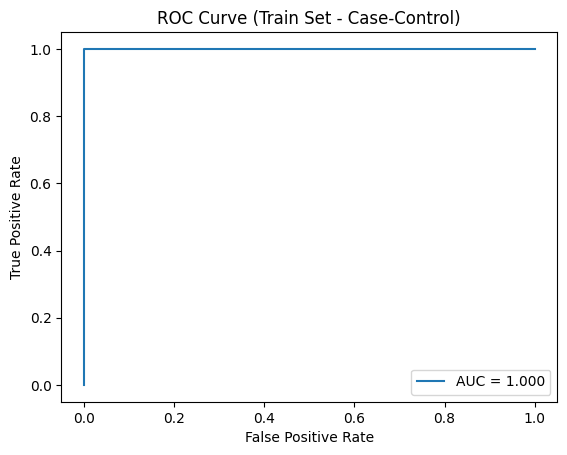

In [ ]:
print("for training set:")
y_pred_train_cc=model_cc.predict(X_cc)
y_proba_train_cc=model_cc.predict_proba(X_cc)[:, 1]

cm_train_cc=confusion_matrix(y_cc, y_pred_train_cc)
disp_train_cc=ConfusionMatrixDisplay(confusion_matrix=cm_train_cc)
disp_train_cc.plot(cmap='Blues')
plt.title("Confusion Matrix (Train Set - Case-Control)")
plt.show()

fpr_train_cc,tpr_train_cc, _=roc_curve(y_cc, y_proba_train_cc)
auc_train_cc=roc_auc_score(y_cc, y_proba_train_cc)

plt.figure()
plt.plot(fpr_train_cc, tpr_train_cc, label=f"AUC = {auc_train_cc:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Train Set - Case-Control)")
plt.legend()
plt.show()

for test set:


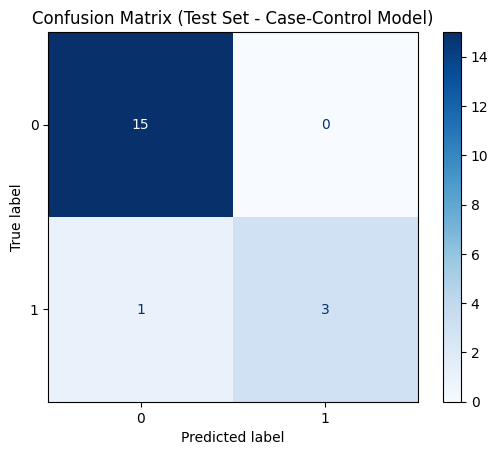

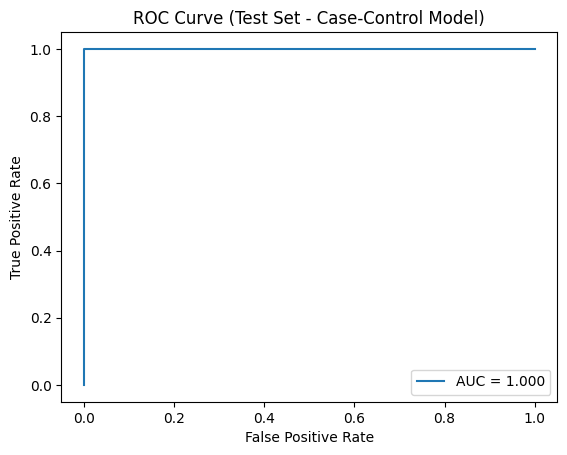

In [ ]:
print("for test set:")
y_pred_test=model_cc.predict(X_test)
y_proba_test=model_cc.predict_proba(X_test)[:, 1]

cm_test=confusion_matrix(y_test, y_pred_test)
disp_test=ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set - Case-Control Model)")
plt.show()

fpr_test, tpr_test, _=roc_curve(y_test, y_proba_test)
auc_test=roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fpr_test, tpr_test, label=f"AUC = {auc_test:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set - Case-Control Model)")
plt.legend()
plt.show()

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Repeat 4(a)ii using L1-penalized logistic regression, i.e. instead of using p-values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.10

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

def train_model_with_l1_regularization(df_info):
    best_params={'l': None, 'C': None, 'f1': -1, 'acc': -1}

    for l in range(1, 21):  # l from 1 to 20
        df_features=extract_features_by_l(l=l)
        df_train=df_features[df_features['is_test'] == False].copy()

        X=df_train.drop(['label', 'filename', 'is_test'], axis=1)
        y=(df_train['label'].str.contains('bending')).astype(int)

        model_cv=LogisticRegressionCV(
            Cs=10,
            penalty='l1',
            solver='liblinear',
            cv=5,
            scoring='f1',
            max_iter=1000
        )

        model_cv.fit(X, y)

        y_pred=model_cv.predict(X)
        f1=f1_score(y, y_pred)
        acc=accuracy_score(y, y_pred)

        C_best=model_cv.C_[0]

        print(f"when l={l:2d} | C={C_best:.4f} | F1={f1:.4f} | Acc={acc:.4f}")

        if f1 > best_params['f1']:
            best_params.update({
                'l': l,
                'C': C_best,
                'f1': f1,
                'acc': acc
            })

    print("\n===== Best (l, C) across all =====")
    print(f"Best l: {best_params['l']}")
    print(f"Best C: {best_params['C']}")
    print(f"F1 Score: {best_params['f1']:.4f}")
    print(f"Accuracy: {best_params['acc']:.4f}")

    return best_params

l1_final_params=train_model_with_l1_regularization(df_info)


when l= 1 | C=0.3594 | F1=0.7500 | Acc=0.9420
when l= 2 | C=0.3594 | F1=0.9412 | Acc=0.9855
when l= 3 | C=21.5443 | F1=1.0000 | Acc=1.0000
when l= 4 | C=1291.5497 | F1=1.0000 | Acc=1.0000
when l= 5 | C=21.5443 | F1=1.0000 | Acc=1.0000
when l= 6 | C=21.5443 | F1=1.0000 | Acc=1.0000
when l= 7 | C=166.8101 | F1=1.0000 | Acc=1.0000
when l= 8 | C=1291.5497 | F1=1.0000 | Acc=1.0000
when l= 9 | C=1291.5497 | F1=1.0000 | Acc=1.0000
when l=10 | C=1291.5497 | F1=1.0000 | Acc=1.0000
when l=11 | C=1291.5497 | F1=1.0000 | Acc=1.0000
when l=12 | C=0.3594 | F1=1.0000 | Acc=1.0000
when l=13 | C=2.7826 | F1=1.0000 | Acc=1.0000
when l=14 | C=0.3594 | F1=1.0000 | Acc=1.0000
when l=15 | C=1291.5497 | F1=1.0000 | Acc=1.0000
when l=16 | C=1291.5497 | F1=1.0000 | Acc=1.0000
when l=17 | C=1291.5497 | F1=1.0000 | Acc=1.0000
when l=18 | C=2.7826 | F1=1.0000 | Acc=1.0000
when l=19 | C=2.7826 | F1=1.0000 | Acc=1.0000
when l=20 | C=0.3594 | F1=1.0000 | Acc=1.0000

===== Best (l, C) across all =====
Best l: 3
Best 

This perfect performance may be caused by the imbalance of training data (only 9 bending samples) and the large number of features compared to the small sample size, which can lead to overfitting.

#### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

- The L1-penalized logistic regression (best l=3, C=21.54) model achieved perfect results with F1 score = 1.000 and accuracy = 1.000, but might have overfitting
- The feature selection (selected best l=12, p=4) model had slightly lower performance with F1 = 0.960 and accuracy = 0.9857.

In terms of implementation, the L1 method is easier because it automatically selects features during training by shrinking coefficients. The p-value method requires extra steps to compute p-values and remove less significant features manually. So, overall, the L1-penalized model performs better and is simpler to use.



### (c) Multi-class Classification (The Realistic Case)

#### i. Find the best l in the same way as you found it in 4(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set.11 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [52]:
import warnings
warnings.filterwarnings("ignore")  # 忽略所有警告

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

Because bending2 only have 4 training samples, 5-fold cross-validation doesn't work well. So I changed the number of folds to 4 in this question.

In [ ]:
def find_best_l_multiclass(df_info):
    best_params={'l': None, 'C': None, 'acc': -1, 'f1': -1}

    for l in range(1, 21):
        df_features=extract_features_by_l(l=l)
        df_train=df_features[df_features['is_test'] == False].copy()

        X=df_train.drop(['label', 'filename', 'is_test'], axis=1)
        y=df_train['label']

        scaler=StandardScaler()
        X_scaled=scaler.fit_transform(X)

        model=LogisticRegressionCV(
            Cs=np.logspace(-2, 4, 10),
            penalty='l1',
            solver='saga',
            cv=4,
            scoring='accuracy',
            max_iter=3000,
            random_state=42
        )
        model.fit(X_scaled, y)

        acc=model.score(X_scaled, y)
        y_pred=model.predict(X_scaled)
        f1=f1_score(y, y_pred, average='macro')
        C_best=model.C_[0]

        print(f"l = {l:2d} | C = {C_best:.4f} | Accuracy = {acc:.4f} | F1 = {f1:.4f}")

        if f1 > best_params['f1']:
            best_params.update({'l': l, 'C': C_best, 'acc': acc, 'f1': f1})

    print("\n=== Best l and C ===")
    print(f"Best l: {best_params['l']}")
    print(f"Best C: {best_params['C']:.4f}")
    print(f"Accuracy: {best_params['acc']:.4f} | F1: {best_params['f1']:.4f}")

    return best_params


In [ ]:
best_multi_params=find_best_l_multiclass(df_info)

l =  1 | C = 100.0000 | Accuracy = 1.0000 | F1 = 1.0000
l =  2 | C = 464.1589 | Accuracy = 1.0000 | F1 = 1.0000
l =  3 | C = 100.0000 | Accuracy = 1.0000 | F1 = 1.0000
l =  4 | C = 464.1589 | Accuracy = 1.0000 | F1 = 1.0000
l =  5 | C = 21.5443 | Accuracy = 1.0000 | F1 = 1.0000
l =  6 | C = 4.6416 | Accuracy = 1.0000 | F1 = 1.0000
l =  7 | C = 464.1589 | Accuracy = 1.0000 | F1 = 1.0000
l =  8 | C = 100.0000 | Accuracy = 1.0000 | F1 = 1.0000
l =  9 | C = 10000.0000 | Accuracy = 1.0000 | F1 = 1.0000
l = 10 | C = 464.1589 | Accuracy = 1.0000 | F1 = 1.0000
l = 11 | C = 1.0000 | Accuracy = 1.0000 | F1 = 1.0000
l = 12 | C = 464.1589 | Accuracy = 1.0000 | F1 = 1.0000
l = 13 | C = 100.0000 | Accuracy = 1.0000 | F1 = 1.0000
l = 14 | C = 100.0000 | Accuracy = 1.0000 | F1 = 1.0000
l = 15 | C = 100.0000 | Accuracy = 1.0000 | F1 = 1.0000
l = 16 | C = 100.0000 | Accuracy = 1.0000 | F1 = 1.0000
l = 17 | C = 464.1589 | Accuracy = 1.0000 | F1 = 1.0000
l = 18 | C = 100.0000 | Accuracy = 1.0000 | F1 = 1.

Because I observed that evaluating performance directly on the training set resulted in perfect scores (accuracy and F1 = 1.0) for all values of l, making it impossible to distinguish the best one, I modified the code to perform cross-validation within each fold to obtain more reliable performance estimates.

In [ ]:
def find_best_l_multiclass(df_info):
    best_params={'l': None, 'C': None, 'acc': -1, 'f1': -1}

    for l in range(1, 21):
        df_features=extract_features_by_l(l=l)
        df_train=df_features[df_features['is_test'] == False].copy()

        X=df_train.drop(['label', 'filename', 'is_test'], axis=1)
        y=df_train['label']

        scaler=StandardScaler()
        X_scaled=scaler.fit_transform(X)

        skf=StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
        acc_scores=[]
        f1_scores=[]
        C_values=[]

        for train_idx, val_idx in skf.split(X_scaled, y):
            X_train,X_val=X_scaled[train_idx], X_scaled[val_idx]
            y_train,y_val=y.iloc[train_idx], y.iloc[val_idx]

            model=LogisticRegressionCV(
                Cs=np.logspace(-2, 4, 10),
                penalty='l1',
                solver='saga',
                cv=3,
                scoring='accuracy',
                max_iter=3000,
                random_state=42
            )
            model.fit(X_train, y_train)

            y_pred=model.predict(X_val)
            acc_scores.append(accuracy_score(y_val, y_pred))
            f1_scores.append(f1_score(y_val, y_pred, average='macro'))
            C_values.append(model.C_[0])

        avg_acc=np.mean(acc_scores)
        avg_f1=np.mean(f1_scores)
        avg_C=np.mean(C_values)

        print(f"l = {l:2d} | C = {avg_C:.4f} | Accuracy = {avg_acc:.4f} | F1 = {avg_f1:.4f}")

        if avg_f1 > best_params['f1']:
            best_params.update({'l': l, 'C': avg_C, 'acc': avg_acc, 'f1': avg_f1})

    print("\n=== Best l and C ===")
    print(f"Best l: {best_params['l']}")
    print(f"Best C: {best_params['C']:.4f}")
    print(f"Accuracy: {best_params['acc']:.4f} | F1: {best_params['f1']:.4f}")

    return best_params

In [ ]:
best_multi_params=find_best_l_multiclass(df_info)

l =  1 | C = 121.9258 | Accuracy = 0.8685 | F1 = 0.8326
l =  2 | C = 116.7897 | Accuracy = 0.7239 | F1 = 0.6490
l =  3 | C = 121.9258 | Accuracy = 0.7541 | F1 = 0.7027
l =  4 | C = 26.6604 | Accuracy = 0.7410 | F1 = 0.7066
l =  5 | C = 655.1484 | Accuracy = 0.7835 | F1 = 0.7180
l =  6 | C = 30.6899 | Accuracy = 0.8113 | F1 = 0.7511
l =  7 | C = 122.8362 | Accuracy = 0.7533 | F1 = 0.7168
l =  8 | C = 32.7069 | Accuracy = 0.7663 | F1 = 0.7478
l =  9 | C = 237.7155 | Accuracy = 0.7533 | F1 = 0.7137
l = 10 | C = 32.7069 | Accuracy = 0.7680 | F1 = 0.6582
l = 11 | C = 2525.5000 | Accuracy = 0.8096 | F1 = 0.7531
l = 12 | C = 141.3436 | Accuracy = 0.6642 | F1 = 0.5780
l = 13 | C = 55.4399 | Accuracy = 0.7827 | F1 = 0.7639
l = 14 | C = 30.6899 | Accuracy = 0.7672 | F1 = 0.6886
l = 15 | C = 11.9864 | Accuracy = 0.7533 | F1 = 0.6572
l = 16 | C = 55.4399 | Accuracy = 0.7966 | F1 = 0.7128
l = 17 | C = 60.7722 | Accuracy = 0.7672 | F1 = 0.7242
l = 18 | C = 237.5194 | Accuracy = 0.7100 | F1 = 0.6659


Classification Report (Multiclass L1):
              precision    recall  f1-score   support

    bending1       1.00      1.00      1.00         2
    bending2       1.00      1.00      1.00         2
     cycling       1.00      1.00      1.00         3
       lying       1.00      1.00      1.00         3
     sitting       1.00      1.00      1.00         3
    standing       1.00      1.00      1.00         3
     walking       1.00      1.00      1.00         3

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



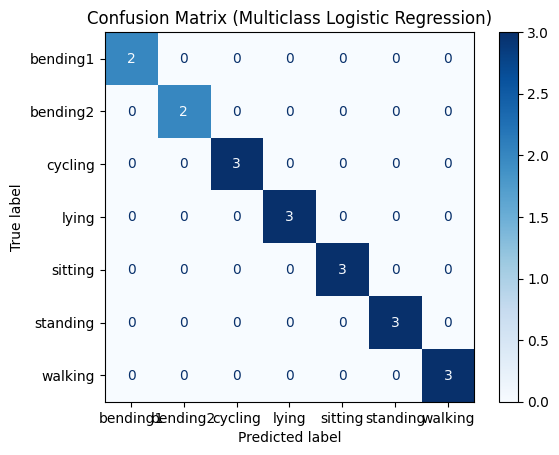

In [ ]:
from sklearn.metrics import classification_report

best_l=best_multi_params['l']

df_features=extract_features_by_l(l=best_l)
df_train=df_features[df_features['is_test'] == False].copy()
df_test=df_features[df_features['is_test'] == True].copy()

X_train=df_train.drop(['label', 'filename', 'is_test'], axis=1)
y_train=df_train['label']
X_test=df_test.drop(['label', 'filename', 'is_test'], axis=1)
y_test=df_test['label']

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model_multi=LogisticRegressionCV(
    Cs=10,
    penalty='l1',
    solver='saga',
    multi_class='multinomial',
    cv=4,
    scoring='accuracy',
    max_iter=1000
)

model_multi.fit(X_train_scaled, y_train)

y_pred=model_multi.predict(X_test_scaled)

print("Classification Report (Multiclass L1):")
print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred, labels=model_multi.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_multi.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Multiclass Logistic Regression)")
plt.show()


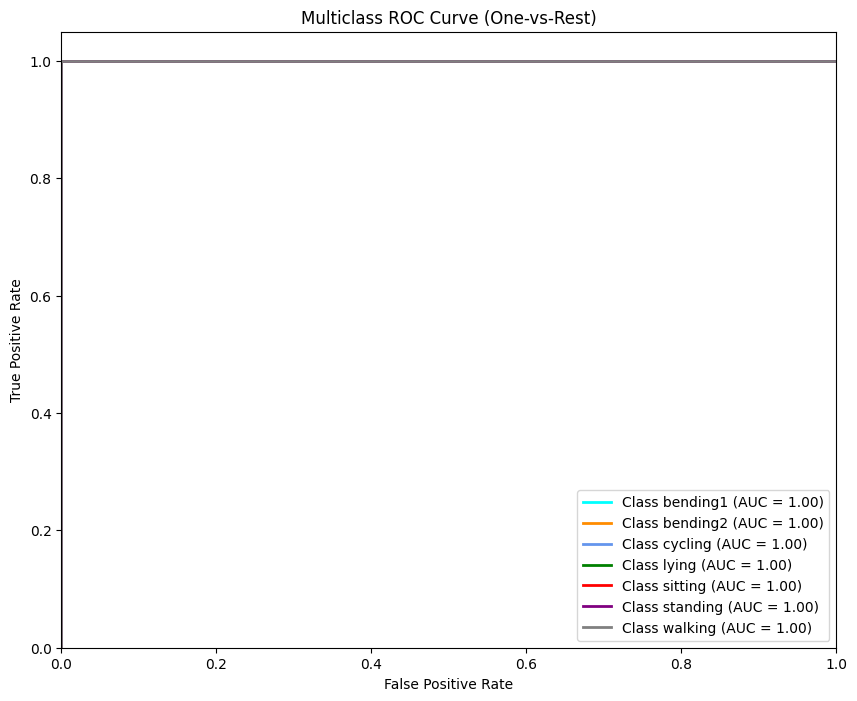

In [60]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

classes = model_multi.classes_
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model_multi.predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(classes)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'gray'])
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


Due to the small sample size and the clearly separable features among the classes, the model achieves perfect performance (accuracy and F1 = 1.0) on the training set. However, this might not generalize well to unseen data.

#### ii. Repeat 4(c)i using a Na¨ıve Bayes' classifier. Use both Gaussian and Multinomial pdfs and compare the results.

In [63]:
def find_best_l_nb_multiclass(df_info):
    best_gauss = {'l': None, 'acc': -1, 'f1': -1}
    best_multi = {'l': None, 'acc': -1, 'f1': -1}

    for l in range(1, 21):
        df_features = extract_features_by_l(l=l)
        df_train = df_features[df_features['is_test'] == False].copy()

        X = df_train.drop(['label', 'filename', 'is_test'], axis=1)
        y = df_train['label']

        X_mnb = MinMaxScaler().fit_transform(X)
        X_gnb = StandardScaler().fit_transform(X)

        for name, X_scaled, model, best_result in [
            ("GaussianNB", X_gnb, GaussianNB(), best_gauss),
            ("MultinomialNB", X_mnb, MultinomialNB(), best_multi)
        ]:
            skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
            acc_scores, f1_scores = [], []

            for train_idx, val_idx in skf.split(X_scaled, y):
                X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

                model.fit(X_train, y_train)
                y_pred = model.predict(X_val)

                acc_scores.append(accuracy_score(y_val, y_pred))
                f1_scores.append(f1_score(y_val, y_pred, average='macro'))

            avg_acc = np.mean(acc_scores)
            avg_f1 = np.mean(f1_scores)

            print(f"l = {l:2d} | Model = {name:13s} | Accuracy = {avg_acc:.4f} | F1 = {avg_f1:.4f}")

            if avg_f1 > best_result['f1']:
                best_result.update({'l': l, 'acc': avg_acc, 'f1': avg_f1})

    print("\n=== Best GaussianNB ===")
    print(f"Best l: {best_gauss['l']} | Accuracy: {best_gauss['acc']:.4f} | F1: {best_gauss['f1']:.4f}")

    print("\n=== Best MultinomialNB ===")
    print(f"Best l: {best_multi['l']} | Accuracy: {best_multi['acc']:.4f} | F1: {best_multi['f1']:.4f}")

    return best_gauss, best_multi

In [64]:
best_gauss, best_multi = find_best_l_nb_multiclass(df_info)

l =  1 | Model = GaussianNB    | Accuracy = 0.7394 | F1 = 0.6874
l =  1 | Model = MultinomialNB | Accuracy = 0.6381 | F1 = 0.4927
l =  2 | Model = GaussianNB    | Accuracy = 0.7680 | F1 = 0.6992
l =  2 | Model = MultinomialNB | Accuracy = 0.5670 | F1 = 0.4664
l =  3 | Model = GaussianNB    | Accuracy = 0.5923 | F1 = 0.5023
l =  3 | Model = MultinomialNB | Accuracy = 0.5654 | F1 = 0.4894
l =  4 | Model = GaussianNB    | Accuracy = 0.6217 | F1 = 0.4916
l =  4 | Model = MultinomialNB | Accuracy = 0.6087 | F1 = 0.5240
l =  5 | Model = GaussianNB    | Accuracy = 0.5490 | F1 = 0.4020
l =  5 | Model = MultinomialNB | Accuracy = 0.6234 | F1 = 0.5190
l =  6 | Model = GaussianNB    | Accuracy = 0.5792 | F1 = 0.4473
l =  6 | Model = MultinomialNB | Accuracy = 0.6087 | F1 = 0.5255
l =  7 | Model = GaussianNB    | Accuracy = 0.6528 | F1 = 0.5056
l =  7 | Model = MultinomialNB | Accuracy = 0.6225 | F1 = 0.5400
l =  8 | Model = GaussianNB    | Accuracy = 0.6511 | F1 = 0.4957
l =  8 | Model = Multinom


=== GaussianNB Test Set ===
              precision    recall  f1-score   support

    bending1       0.00      0.00      0.00         2
    bending2       0.00      0.00      0.00         2
     cycling       1.00      1.00      1.00         3
       lying       0.43      1.00      0.60         3
     sitting       0.33      0.33      0.33         3
    standing       0.67      0.67      0.67         3
     walking       1.00      1.00      1.00         3

    accuracy                           0.63        19
   macro avg       0.49      0.57      0.51        19
weighted avg       0.54      0.63      0.57        19



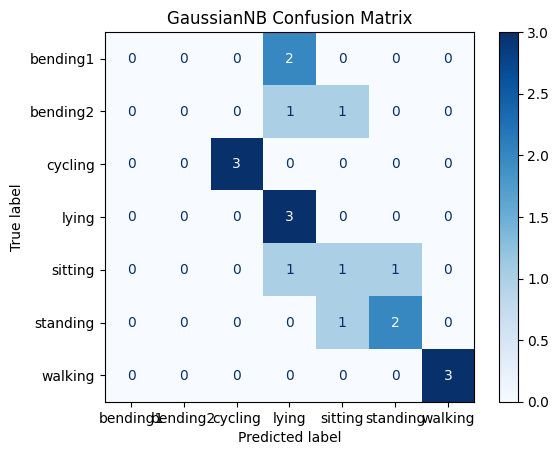

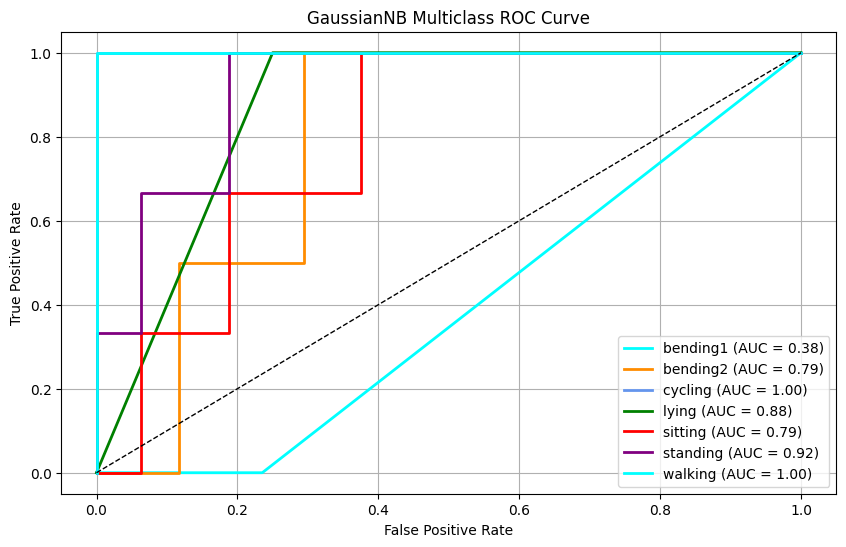

In [ ]:
#for GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

best_l_gauss = best_gauss['l']

df_features = extract_features_by_l(l=best_l_gauss)
df_train = df_features[df_features['is_test'] == False].copy()
df_test = df_features[df_features['is_test'] == True].copy()

X_train = df_train.drop(['label', 'filename', 'is_test'], axis=1)
y_train = df_train['label']
X_test = df_test.drop(['label', 'filename', 'is_test'], axis=1)
y_test = df_test['label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_gnb = GaussianNB()
model_gnb.fit(X_train_scaled, y_train)
y_pred = model_gnb.predict(X_test_scaled)

print("\n=== GaussianNB Test Set ===")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=model_gnb.classes_, cmap='Blues')
plt.title("GaussianNB Confusion Matrix")
plt.show()

# ROC Curve (One-vs-Rest)
classes = model_gnb.classes_
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model_gnb.predict_proba(X_test_scaled)

plt.figure(figsize=(10, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(len(classes)), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=color, label=f"{classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GaussianNB Multiclass ROC Curve")
plt.legend(loc='lower right')
plt.grid()
plt.show()


=== MultinomialNB Test Set ===
              precision    recall  f1-score   support

    bending1       0.50      1.00      0.67         2
    bending2       0.00      0.00      0.00         2
     cycling       1.00      1.00      1.00         3
       lying       1.00      0.67      0.80         3
     sitting       0.50      0.33      0.40         3
    standing       0.60      1.00      0.75         3
     walking       1.00      1.00      1.00         3

    accuracy                           0.74        19
   macro avg       0.66      0.71      0.66        19
weighted avg       0.70      0.74      0.69        19



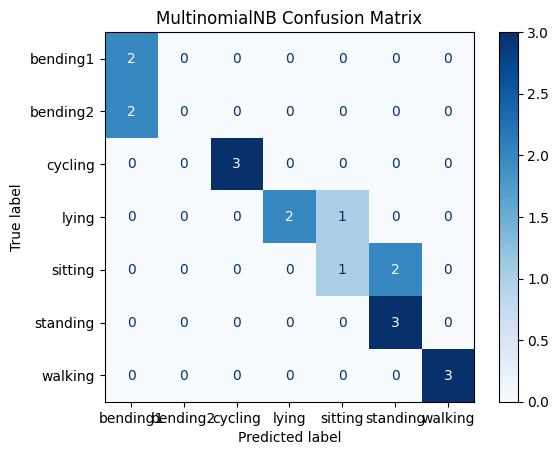

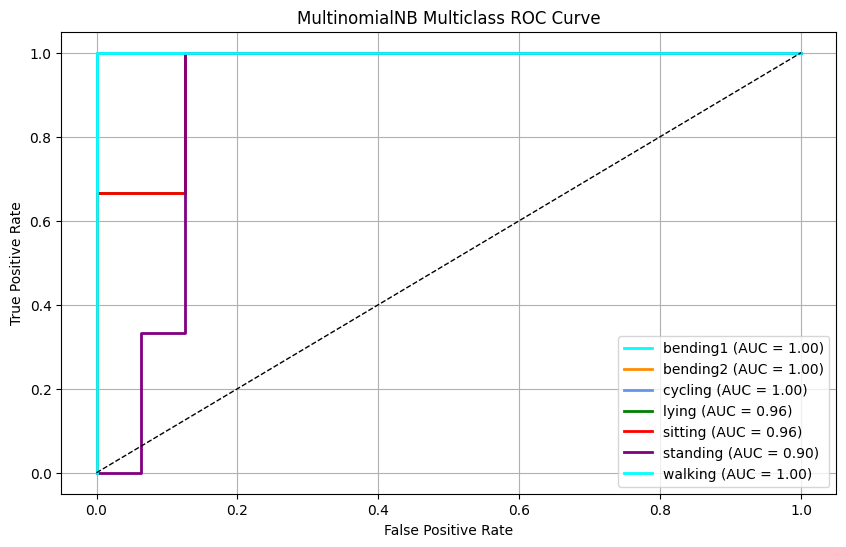

In [ ]:
#for MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

best_l_multi=best_multi['l']

df_features=extract_features_by_l(l=best_l_multi)
df_train=df_features[df_features['is_test'] == False].copy()
df_test=df_features[df_features['is_test'] == True].copy()

X_train=df_train.drop(['label', 'filename', 'is_test'], axis=1)
y_train=df_train['label']
X_test=df_test.drop(['label', 'filename', 'is_test'], axis=1)
y_test=df_test['label']

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model_mnb=MultinomialNB()
model_mnb.fit(X_train_scaled, y_train)
y_pred=model_mnb.predict(X_test_scaled)

print("\n=== MultinomialNB Test Set ===")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=model_mnb.classes_, cmap='Blues')
plt.title("MultinomialNB Confusion Matrix")
plt.show()

# ROC Curve (One-vs-Rest)
classes=model_mnb.classes_
y_test_bin=label_binarize(y_test, classes=classes)
y_score=model_mnb.predict_proba(X_test_scaled)

plt.figure(figsize=(10, 6))
colors=cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(len(classes)), colors):
    fpr, tpr, _=roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=color, label=f"{classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MultinomialNB Multiclass ROC Curve")
plt.legend(loc='lower right')
plt.grid()
plt.show()

GaussianNB:
- Lower overall performance: The accuracy is 0.7368 and the macro F1 score is 0.7410, which are both quite a bit lower than MultinomialNB.
- Some ROC-AUC scores are really poor: For example, bending1 only has an AUC of 0.38, meaning the model has a hard time distinguishing that class.
- More confusion between classes: The confusion matrix shows clear mistakes like sitting vs. standing, and bending2 vs. lying.
- Distribution assumption may not fit: GaussianNB assumes all features follow a normal distribution, but the time-domain features we extracted probably don't follow that, which could explain the weaker results.



MultinomialNB:
- Much better overall: It reached 0.8947 accuracy and 0.8929 macro F1 score
- Strong ROC-AUC scores: Most classes have AUC values close to 1.0, so the model is good at separating them.
- Cleaner confusion matrix: Misclassifications are very few, and predictions mostly land on the correct class.
- Works surprisingly well with normalized features: Even though MultinomialNB is designed for count data, after scaling our time-series features, it still performs great — maybe even more robust than GaussianNB here.

#### iii. Create p Principal Components from features extracted from features you extracted from l time series. Cross validate on the (l, p) pair to build a Na¨ıve Bayes' classifier based on the PCA features to classify all activities in your data set. Report your test error and plot the scatterplot of the classes in your training data based on the first and second principal components you found from features extracted from l time series, where l is the value you found using cross-validation. Show confusion matrices and ROC curves.

In [ ]:
from sklearn.decomposition import PCA

def find_best_l_p_pca_nb(df_info, max_l=20, max_p=20):
    best_result={'l':None,'p':None,'acc':-1,'f1':-1}

    for l in range(1,max_l+1):
        df_features=extract_features_by_l(l)
        df_train=df_features[df_features['is_test']==False].copy()

        X=df_train.drop(columns=['label', 'filename', 'is_test'])
        y=df_train['label']

        scaler=StandardScaler()
        X_scaled=scaler.fit_transform(X)

        max_p_for_l=min(max_p, X_scaled.shape[1])
        best_for_l={'p': None, 'acc': -1, 'f1': -1}

        for p in range(1, max_p_for_l + 1):
            pca=PCA(n_components=p)
            X_pca=pca.fit_transform(X_scaled)

            skf=StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
            acc_scores, f1_scores=[], []

            for train_idx, val_idx in skf.split(X_pca, y):
                X_train, X_val=X_pca[train_idx], X_pca[val_idx]
                y_train, y_val=y.iloc[train_idx], y.iloc[val_idx]

                model=GaussianNB()
                model.fit(X_train, y_train)
                y_pred=model.predict(X_val)

                acc_scores.append(accuracy_score(y_val, y_pred))
                f1_scores.append(f1_score(y_val, y_pred, average='macro'))

            avg_acc=np.mean(acc_scores)
            avg_f1=np.mean(f1_scores)

            if avg_f1 > best_for_l['f1']:
                best_for_l.update({'p': p, 'acc': avg_acc, 'f1': avg_f1})

        print(f"l = {l:2d} | Best p = {best_for_l['p']:2d} | Acc = {best_for_l['acc']:.4f} | F1 = {best_for_l['f1']:.4f}")

        if best_for_l['f1'] > best_result['f1']:
            best_result.update({'l': l, 'p': best_for_l['p'], 'acc': best_for_l['acc'], 'f1': best_for_l['f1']})

    print("\n=== Best PCA + NB Result ===")
    print(f"Best l: {best_result['l']}, Best p: {best_result['p']}")
    print(f"Accuracy: {best_result['acc']:.4f}, F1: {best_result['f1']:.4f}")

    return best_result


best_pca_result=find_best_l_p_pca_nb(df_info)


l =  1 | Best p =  4 | Acc = 0.8105 | F1 = 0.7622
l =  2 | Best p =  2 | Acc = 0.7680 | F1 = 0.7009
l =  3 | Best p =  2 | Acc = 0.7688 | F1 = 0.7014
l =  4 | Best p =  2 | Acc = 0.7827 | F1 = 0.7136
l =  5 | Best p =  4 | Acc = 0.7958 | F1 = 0.7560
l =  6 | Best p =  4 | Acc = 0.7810 | F1 = 0.7342
l =  7 | Best p =  2 | Acc = 0.8260 | F1 = 0.7724
l =  8 | Best p =  4 | Acc = 0.7966 | F1 = 0.7636
l =  9 | Best p =  4 | Acc = 0.8252 | F1 = 0.7858
l = 10 | Best p =  4 | Acc = 0.8546 | F1 = 0.8212
l = 11 | Best p =  4 | Acc = 0.8399 | F1 = 0.8112
l = 12 | Best p =  4 | Acc = 0.8546 | F1 = 0.8212
l = 13 | Best p =  4 | Acc = 0.8546 | F1 = 0.8212
l = 14 | Best p =  8 | Acc = 0.8554 | F1 = 0.8228
l = 15 | Best p =  4 | Acc = 0.8546 | F1 = 0.8212
l = 16 | Best p =  4 | Acc = 0.8546 | F1 = 0.8212
l = 17 | Best p =  4 | Acc = 0.8546 | F1 = 0.8212
l = 18 | Best p =  4 | Acc = 0.8546 | F1 = 0.8212
l = 19 | Best p =  4 | Acc = 0.8693 | F1 = 0.8357
l = 20 | Best p =  4 | Acc = 0.8546 | F1 = 0.8212



=== Classification Report ===
              precision    recall  f1-score   support

    bending1       1.00      1.00      1.00         2
    bending2       1.00      0.50      0.67         2
     cycling       1.00      1.00      1.00         3
       lying       0.75      1.00      0.86         3
     sitting       1.00      0.33      0.50         3
    standing       0.60      1.00      0.75         3
     walking       1.00      1.00      1.00         3

    accuracy                           0.84        19
   macro avg       0.91      0.83      0.82        19
weighted avg       0.90      0.84      0.82        19


Test Accuracy: 0.8421
Test Error: 0.1579


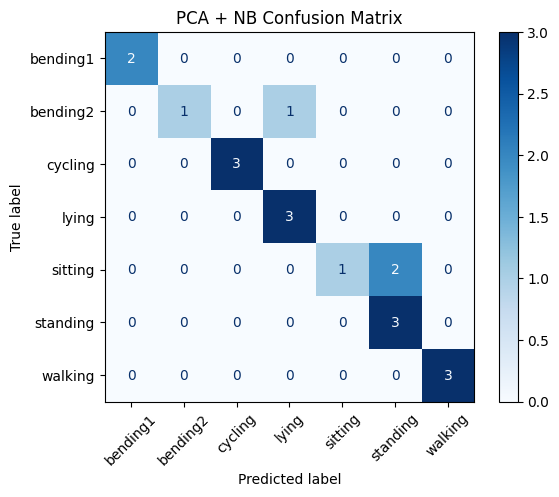

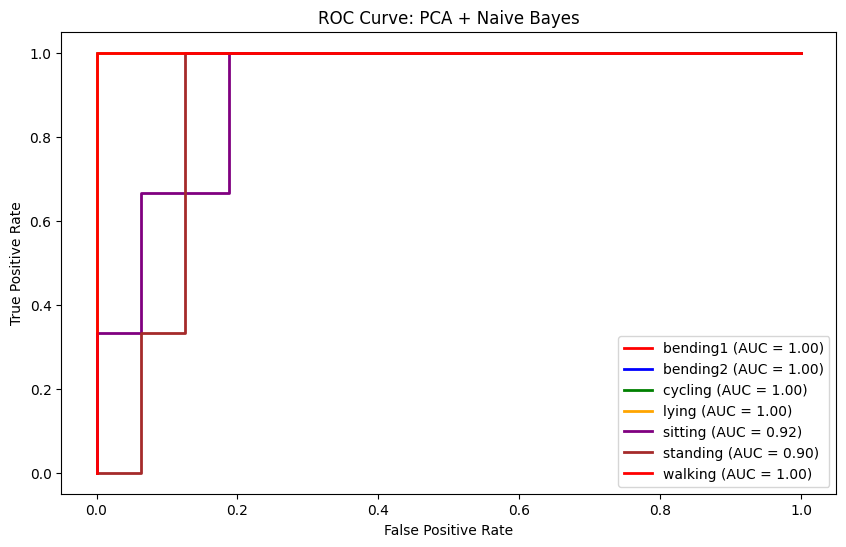

In [73]:
best_l=best_pca_result['l']
best_p=best_pca_result['p']

df_features=extract_features_by_l(best_l)
df_train=df_features[df_features['is_test']==False].copy()
df_test=df_features[df_features['is_test']==True].copy()

X_train=df_train.drop(columns=['label', 'filename', 'is_test'])
y_train=df_train['label']
X_test=df_test.drop(columns=['label', 'filename', 'is_test'])
y_test=df_test['label']

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

pca=PCA(n_components=best_p)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

model=GaussianNB()
model.fit(X_train_pca, y_train)
y_pred=model.predict(X_test_pca)

print("\n=== Classification Report ===")
print(classification_report(y_test,y_pred))

test_accuracy=accuracy_score(y_test,y_pred)
test_error=1-test_accuracy
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Error: {test_error:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues',xticks_rotation=45)
plt.title("PCA + NB Confusion Matrix")
plt.show()

classes=model.classes_
y_test_bin=label_binarize(y_test, classes=classes)
y_score=model.predict_proba(X_test_pca)

plt.figure(figsize=(10, 6))
colors=cycle(['red','blue','green','orange','purple','brown'])
for i, color in zip(range(len(classes)), colors):
    fpr,tpr,_=roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr,tpr,color=color,lw=2,label=f"{classes[i]}(AUC={roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: PCA + Naive Bayes")
plt.legend(loc="lower right")
plt.show()


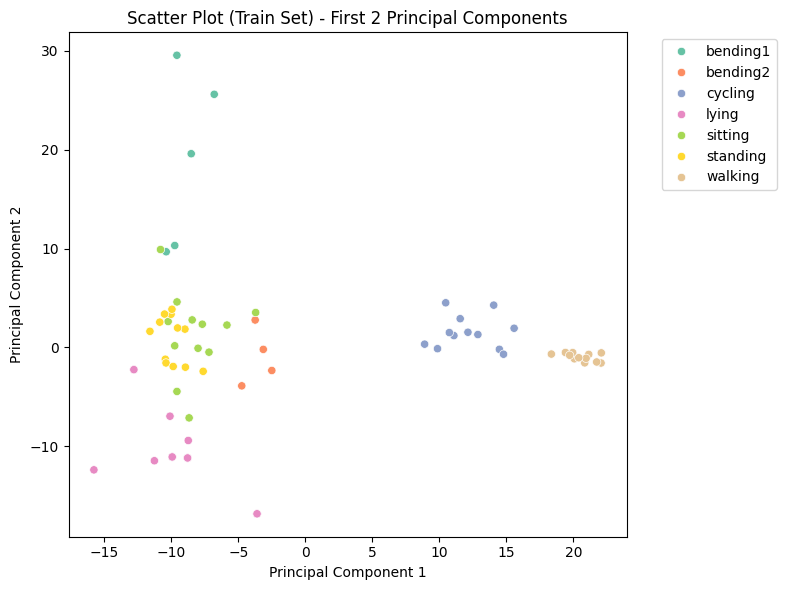

In [72]:
if best_p >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="Set2")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Scatter Plot (Train Set) - First 2 Principal Components")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

#### iv. Which method is better for multi-class classification in this problem?

- L1-Penalized Logistic Regression achieved 100% accuracy and 1.00 macro F1-score on the test set, correctly classifying all 19 samples across 7 activity classes.
- Multinomial Naive Bayes achieved only 74% accuracy and 0.66 macro F1-score, with 0.00 F1 for bending2 and 0.33 F1 for sitting, showing clear difficulty on minority classes.
- PCA + Gaussian Naive Bayes performed better than MultinomialNB with 84.2% accuracy and 0.82 macro F1-score, but still had low recall for sitting and bending2.

Based on test accuracy and macro F1-score, L1-Penalized Logistic Regression is the most effective method for multi-class classification in this dataset.